In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

# **_Reading the Dataset_**

In [25]:
data=pd.read_csv('final_internship_data.csv')
data.head()

User ID          User Name       Driver Name Car Condition Weather  \
0  KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1  lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2  gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3  9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4  8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   

   Traffic Condition                            key  fare_amount  \
0  Congested Traffic    2009-06-15 17:26:21.0000001          4.5   
1       Flow Traffic    2010-01-05 16:52:16.0000002         16.9   
2  Congested Traffic   2011-08-18 00:35:00.00000049          5.7   
3       Flow Traffic    2012-04-21 04:30:42.0000001          7.7   
4  Congested Traffic  2010-03-09 07:51:00.000000135          5.3   

       pickup_datetime  pickup_longitude  ...  month  weekday  year  \
0  2009-06-15 17:26:21         -1.288826  ...      6        0  2009   
1  2010-01-05 16:52:16         -1.291824  ...      1        1  2010   
2  2011-08-18 00:35:00         -1.291242  ...      8        3  2011   
3  2012-04-21 04:30:42         -1.291319  ...      4        5  2012   
4  2010-03-09 07:51:00         -1.290987  ...      3        1  2010   

    jfk_dist   ewr_dist   lga_dist   sol_dist   nyc_dist  distance   bearing  
0  20.265840  55.176046  14.342611  34.543548  27.572573  1.030764 -2.918897  
1  44.667679  31.832358  23.130775  15.125872   8.755732  8.450134 -0.375217  
2  43.597686  33.712082  19.865289  17.722624   9.847344  1.389525  2.599961  
3  42.642965  32.556289  21.063132  15.738963   7.703421  2.799270  0.133905  
4  43.329953  39.406828  15.219339  23.732406  15.600745  1.999157 -0.502703  

[5 rows x 26 columns]

In [26]:
data.tail()

User ID          User Name      Driver Name Car Condition Weather  \
499995  er7Luy6J       Morgan Smith  Gabriel Coleman           Bad   rainy   
499996  FWDZu9NA     Dillon Jackson   Larry Richards     Very Good   rainy   
499997  QZIMcpLZ  Michael Rodriguez   Lonnie Santana           Bad   rainy   
499998  AD72Uwmn       Deborah Soto     Emily Rivera          Good  stormy   
499999  qGKn4Um5         Eric Jones       Julie King     Very Good   sunny   

        Traffic Condition                          key  fare_amount  \
499995      Dense Traffic  2015-05-07 18:45:12.0000004          7.0   
499996       Flow Traffic  2010-09-13 12:11:34.0000004         13.7   
499997       Flow Traffic  2014-08-25 00:22:20.0000001         25.0   
499998  Congested Traffic  2015-01-12 12:17:32.0000001          6.5   
499999       Flow Traffic  2010-04-12 23:46:58.0000002          4.9   

            pickup_datetime  pickup_longitude  ...  month  weekday  year  \
499995  2015-05-07 18:45:12         -1.291173  ...      5        3  2015   
499996  2010-09-13 12:11:34         -1.291595  ...      9        0  2010   
499997  2014-08-25 00:22:20         -1.291262  ...      8        0  2014   
499998  2015-01-12 12:17:32         -1.291101  ...      1        0  2015   
499999  2010-04-12 23:46:58         -1.291312  ...      4        0  2010   

         jfk_dist   ewr_dist   lga_dist   sol_dist   nyc_dist  distance  \
499995  42.565403  36.580043  17.157511  20.401068  12.280187  1.404709   
499996  41.814877  27.833416  26.463167   8.596656   0.994796  0.994184   
499997  31.780108  38.960930  19.708214  19.066488  11.663395  7.859324   
499998  42.292914  36.382813  17.227166  20.006433  11.819775  0.994470   
499999  38.822968  31.517592  23.087427  11.950577   3.873636  1.040272   

         bearing  
499995 -2.275706  
499996  2.556931  
499997 -1.926251  
499998 -0.384817  
499999 -2.813690  

[5 rows x 26 columns]

In [27]:
data.shape

(500000, 26)

In [28]:
data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  500000.000000     500000.000000    500000.000000      499995.000000   
mean       11.358361         -1.265712         0.696740          -1.265755   
std         9.916617          0.206941         0.140909           0.205903   
min       -44.900000        -52.119764       -54.389440         -59.049665   
25%         6.000000         -1.291405         0.710958          -1.291393   
50%         8.500000         -1.291226         0.711268          -1.291197   
75%        12.500000         -1.290970         0.711520          -1.290908   
max       500.000000         37.360538        29.724576           0.712985   

       dropoff_latitude  passenger_count           hour            day  \
count     499995.000000    500000.000000  500000.000000  500000.000000   
mean           0.696675         1.683428      13.510834      15.684206   
std            0.128997         1.307395       6.511571       8.681066   
min          -44.676047         0.000000       0.000000       1.000000   
25%            0.710943         1.000000       9.000000       8.000000   
50%            0.711277         1.000000      14.000000      16.000000   
75%            0.711538         2.000000      19.000000      23.000000   
max            7.061893         6.000000      23.000000      31.000000   

               month        weekday           year       jfk_dist  \
count  500000.000000  500000.000000  500000.000000  499995.000000   
mean        6.268650       3.042008    2011.739132     385.279367   
std         3.437815       1.949240       1.860889    2419.087483   
min         1.000000       0.000000    2009.000000       1.017646   
25%         3.000000       1.000000    2010.000000      41.341514   
50%         6.000000       3.000000    2012.000000      42.523163   
75%         9.000000       5.000000    2013.000000      43.785649   
max        12.000000       6.000000    2015.000000   30133.067880   

            ewr_dist       lga_dist       sol_dist       nyc_dist  \
count  499995.000000  499995.000000  499995.000000  499995.000000   
mean      380.503657     363.843772     363.674038     355.991423   
std      2428.804740    2425.075903    2428.348683    2428.730839   
min         1.460945       0.382119       0.532545       0.080500   
25%        32.173712      17.100762      14.886989       7.147384   
50%        34.787507      19.591554      18.347580      10.458151   
75%        38.304502      22.214815      22.417812      14.448699   
max     30167.595967   30167.285794   30159.407296   30162.285356   

            distance        bearing  
count  499995.000000  499995.000000  
mean       19.468775       0.297145  
std       367.299601       1.804548  
min         0.000000      -3.141593  
25%         1.214550      -0.854721  
50%         2.116970      -0.050442  
75%         3.890070       2.206769  
max     12399.956433       3.141593

In [29]:
col=data.columns
col

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [30]:
data.nunique()

User ID              500000
User Name            221675
Driver Name          221700
Car Condition             4
Weather                   5
Traffic Condition         3
key                  500000
fare_amount            1688
pickup_datetime      461206
pickup_longitude      95037
pickup_latitude      119115
dropoff_longitude    108283
dropoff_latitude     135053
passenger_count           7
hour                     24
day                      31
month                    12
weekday                   7
year                      7
jfk_dist             490613
ewr_dist             490613
lga_dist             490613
sol_dist             490613
nyc_dist             490613
distance             485705
bearing              485636
dtype: int64

In [31]:
data.duplicated().sum()

np.int64(0)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [34]:
data.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [35]:
df_cleaned = data.dropna()

In [36]:
df_cleaned.shape

(499995, 26)

In [37]:
df_cleaned.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64

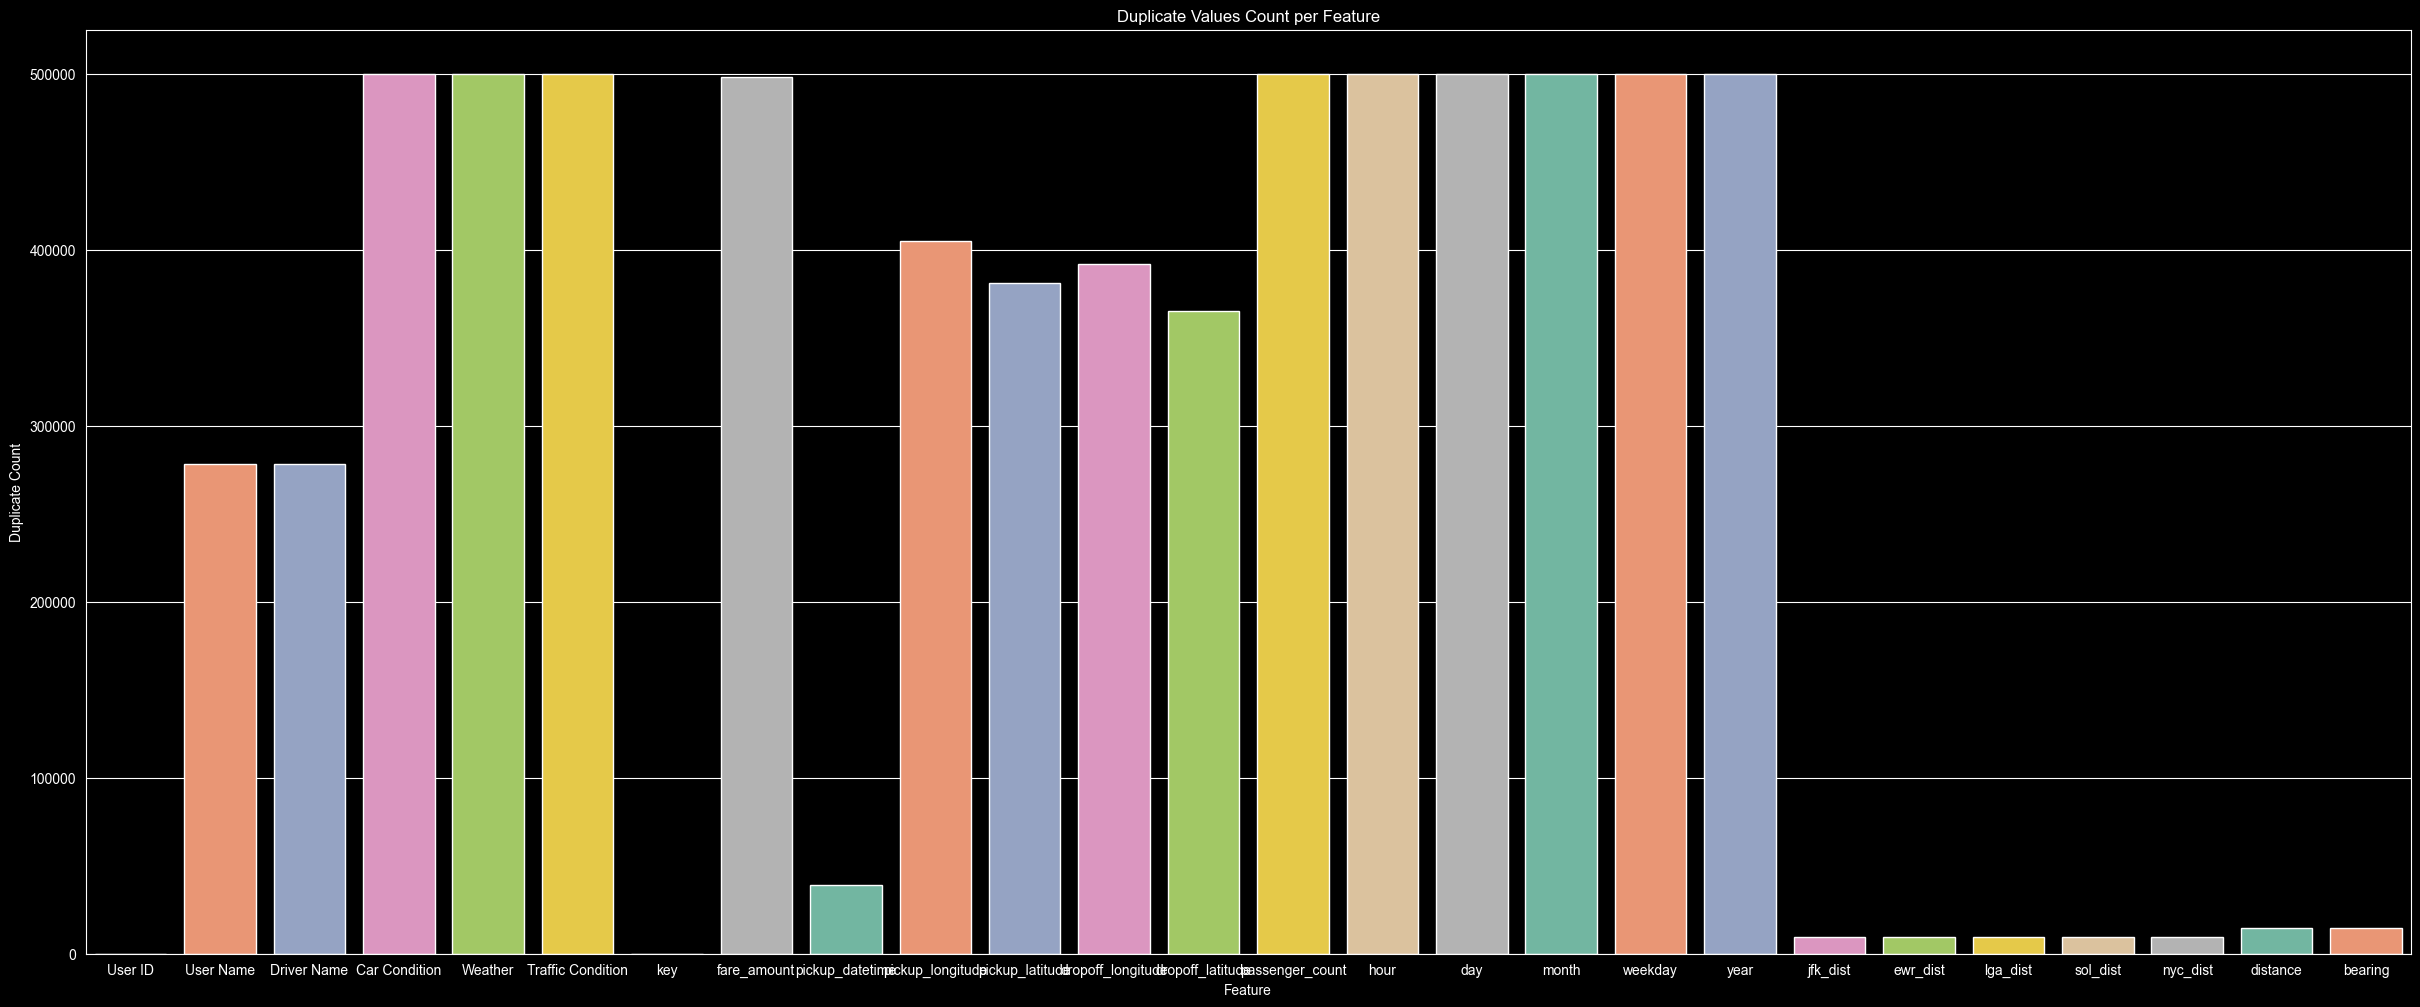

In [38]:
def count_duplicates(df):
    duplicate_counts = {}
    for column in df.columns:
        # Count duplicates in the column
        count = df[column].duplicated().sum()
        duplicate_counts[column] = count
    return duplicate_counts

# Calculate duplicates
duplicates = count_duplicates(df_cleaned)

# Convert the duplicates dictionary into a DataFrame for easier plotting
duplicates_df = pd.DataFrame(list(duplicates.items()), columns=['Feature', 'Duplicate Count'])

# Plot using Seaborn
plt.figure(figsize=(30, 12))
sns.barplot(x='Feature', y='Duplicate Count', data=duplicates_df, palette='Set2')

# Add titles and labels
plt.title('Duplicate Values Count per Feature')
plt.xlabel('Feature')
plt.ylabel('Duplicate Count')

# Show the plot
plt.show()

In [39]:
#data['car parking space'].unique()
for c in col:
  print(c)
  print(data[c].unique())
  print('******************')

User ID
['KHVrEVlD' 'lPxIuEri' 'gsVN8JLS' ... 'QZIMcpLZ' 'AD72Uwmn' 'qGKn4Um5']
******************
User Name
['Kimberly Adams' 'Justin Tapia' 'Elizabeth Lopez' ... 'Monique Wade'
 'Wanda Parks' 'Dillon Jackson']
******************
Driver Name
['Amy Butler' 'Hannah Zimmerman' 'Amanda Jackson' ... 'Gabriel Coleman'
 'Larry Richards' 'Lonnie Santana']
******************
Car Condition
['Very Good' 'Excellent' 'Bad' 'Good']
******************
Weather
['windy' 'cloudy' 'stormy' 'sunny' 'rainy']
******************
Traffic Condition
['Congested Traffic' 'Flow Traffic' 'Dense Traffic']
******************
key
['2009-06-15 17:26:21.0000001' '2010-01-05 16:52:16.0000002'
 '2011-08-18 00:35:00.00000049' ... '2014-08-25 00:22:20.0000001'
 '2015-01-12 12:17:32.0000001' '2010-04-12 23:46:58.0000002']
******************
fare_amount
[ 4.5  16.9   5.7  ... 45.58 70.75 71.7 ]
******************
pickup_datetime
['2009-06-15 17:26:21' '2010-01-05 16:52:16' '2011-08-18 00:35:00' ...
 '2014-08-25 00:22:20' '2

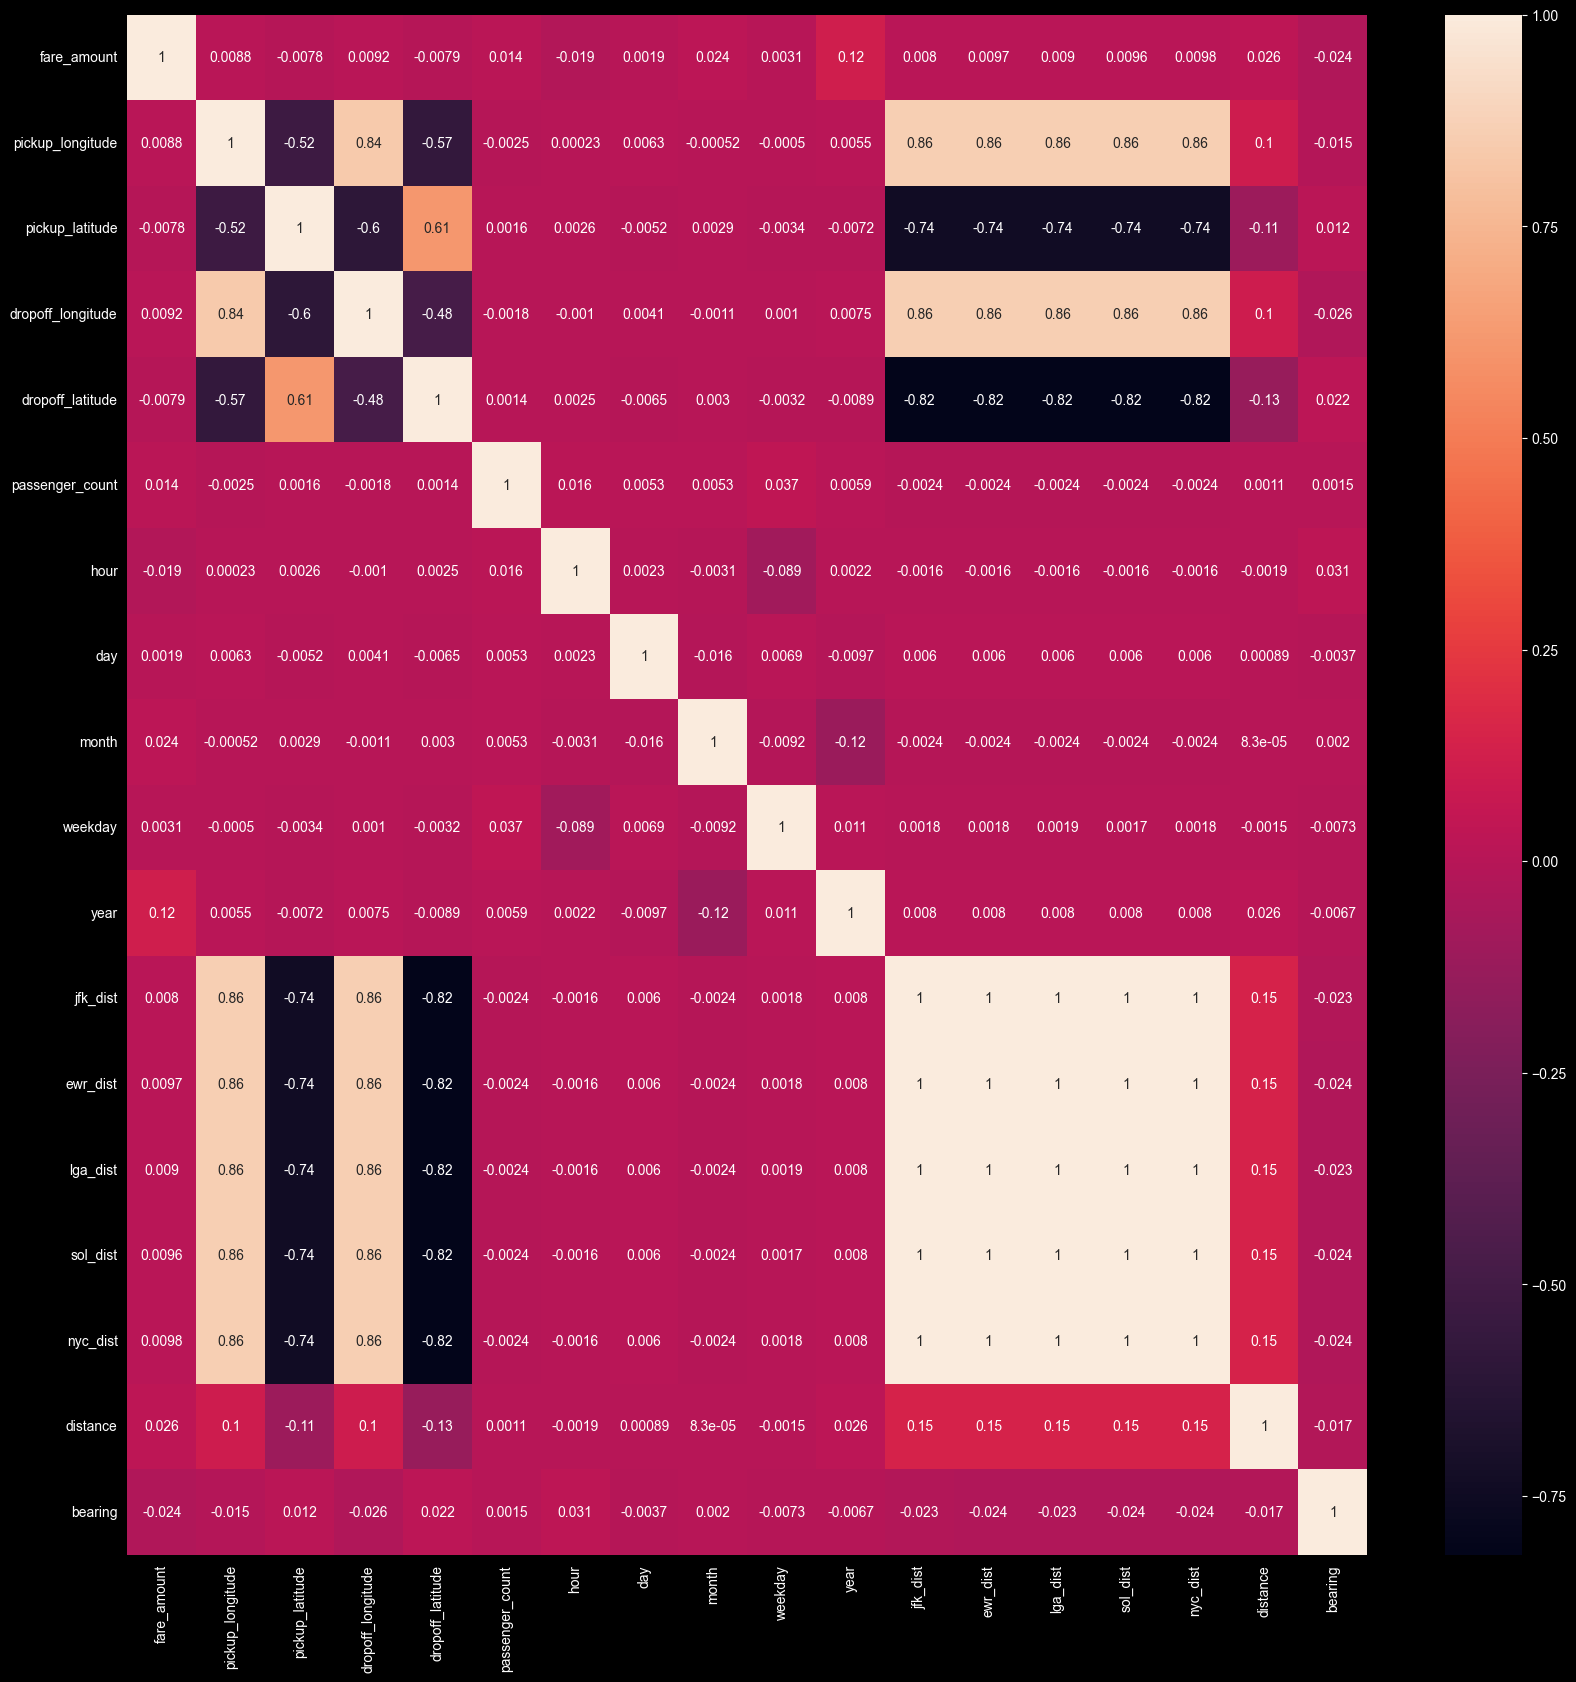

In [40]:
plt.figure(figsize=(20, 20))
cor = data.select_dtypes(include=[np.number]).corr()

# Generate a heatmap
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns,annot=True )

# Show the plot
plt.show()



In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499995 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            499995 non-null  object 
 1   User Name          499995 non-null  object 
 2   Driver Name        499995 non-null  object 
 3   Car Condition      499995 non-null  object 
 4   Weather            499995 non-null  object 
 5   Traffic Condition  499995 non-null  object 
 6   key                499995 non-null  object 
 7   fare_amount        499995 non-null  float64
 8   pickup_datetime    499995 non-null  object 
 9   pickup_longitude   499995 non-null  float64
 10  pickup_latitude    499995 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    499995 non-null  int64  
 14  hour               499995 non-null  int64  
 15  day                499995 non-null  int64  
 16  month  

### Handling Outliers

In [42]:
#check for outliers

def find_outliers(df):
    '''
    Find outliers in a DataFrame

    Parameters
    ----------
    df : pandas.DataFrame
    '''
    outliers = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].tolist()
            print(f"Number of outliers in column {column}: {len(outliers[column])}")
    return outliers

def remove_outliers(df):
    '''
    Remove outliers from a DataFrame

    Parameters
    ----------
    df : pandas.DataFrame
    '''
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [43]:
# Check for outliers in the DataFrame
outliers = find_outliers(df_cleaned)

# Print outliers
print("Outliers found:")
for column, values in outliers.items():
    print(f"{column}: {values}")

Number of outliers in column fare_amount: 43329
Number of outliers in column pickup_longitude: 33965
Number of outliers in column pickup_latitude: 23701
Number of outliers in column dropoff_longitude: 35805
Number of outliers in column dropoff_latitude: 30748
Number of outliers in column passenger_count: 56526
Number of outliers in column hour: 0
Number of outliers in column day: 0
Number of outliers in column month: 0
Number of outliers in column weekday: 0
Number of outliers in column year: 0
Number of outliers in column jfk_dist: 59285
Number of outliers in column ewr_dist: 28380
Number of outliers in column lga_dist: 22539
Number of outliers in column sol_dist: 18610


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



distance: [8.450133595805992, 9.403295658389682, 12.782055688363112, 11.60377396457914, 9.63435442314002, 12.50317416439791, 8.300768180995084, 9.717643366961964, 19.85369899268661, 13.333604922939315, 20.44100631762892, 8.814547103661688, 8.381057510342718, 14.0454153965824, 10.181968855769965, 10.659515723235945, 17.984675557480138, 9.449584697391357, 20.309358188558093, 9.184178812065662, 14.978908547499316, 9.334016079156635, 21.37478766750501, 8.18296880379005, 15.740429145272918, 11.038001188871872, 15.577566770815263, 9.239850413021465, 9.47197210684201, 10.371758036267696, 9.009499953953732, 8.724894617140725, 11.017686990524814, 9.295396195281535, 20.53255804696944, 21.416092063875794, 20.73574376674507, 10.448179889647136, 9.8915134203037, 8.795060766105008, 8667.30496795587, 8.263164628807722, 12.375318495256666, 9.395660179836192, 18.956866525817933, 23.066626629825144, 21.036035329678416, 9.583080112152263, 20.142190128535088, 22.307556769620216, 8.678677055138355, 39.4769

In [45]:
# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df_cleaned)
# 
# # Print cleaned DataFrame
# print("DataFrame after removing outliers:")
# print(df_cleaned)

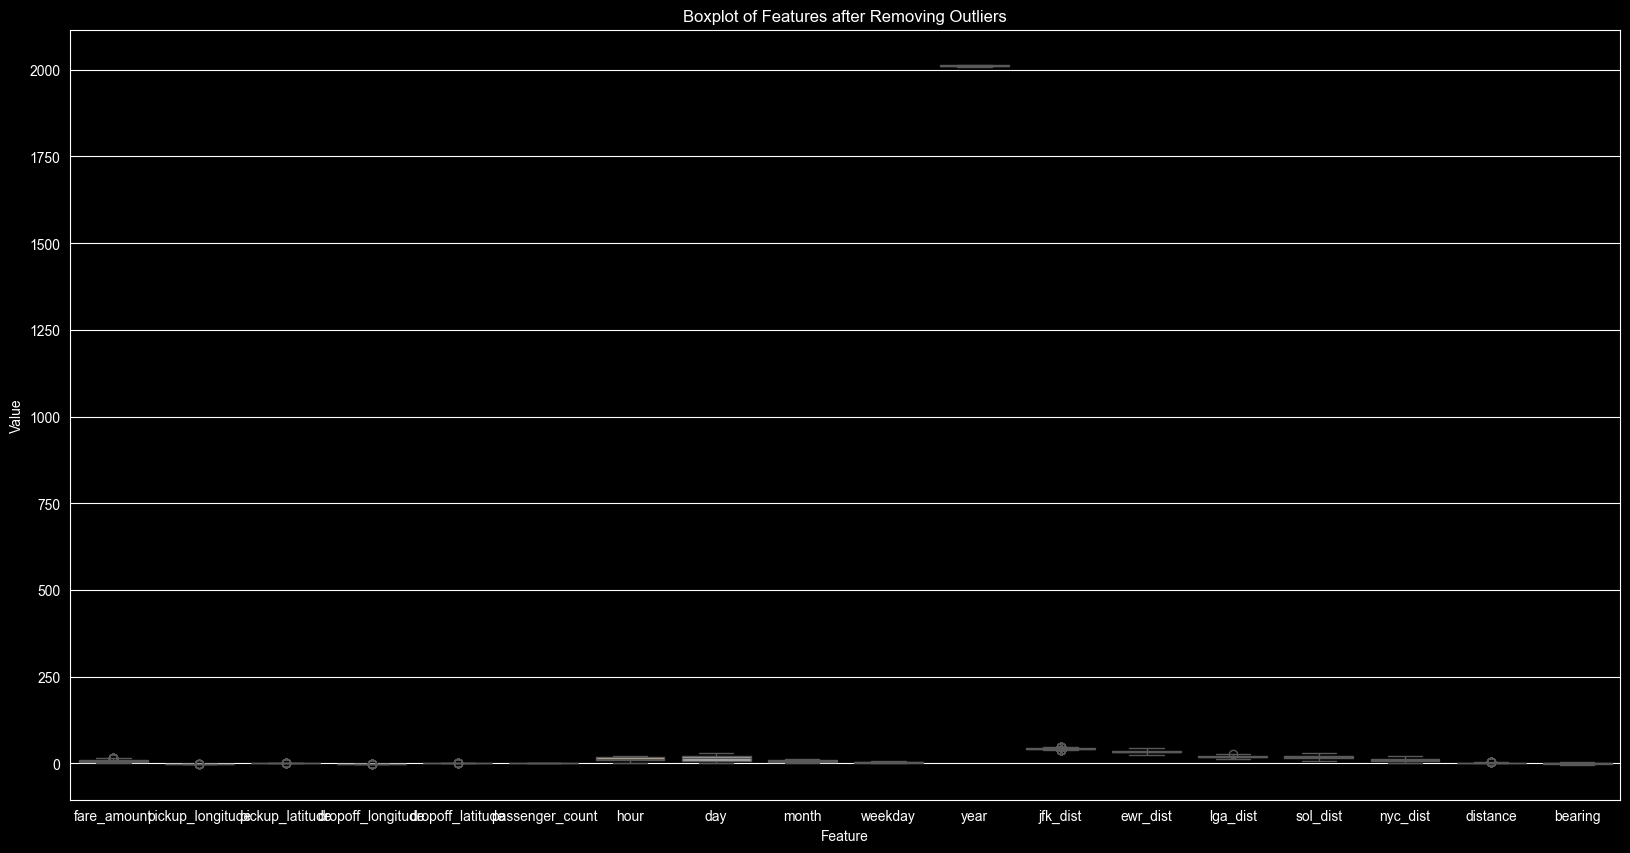

In [48]:
# Plotting boxplot after removing outliers
plt.figure(figsize=(20, 10))  # Adjust the figure size if needed
sns.boxplot(data=df_cleaned, palette='Set2')
plt.title('Boxplot of Features after Removing Outliers')
plt.xlabel('Feature')
plt.ylabel('Value')

# Show the plot
plt.show()

In [17]:
columns_need_labeles=['User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition']
label_encoders = {}
df_cleaned_labeled=df_cleaned.copy()
for column in columns_need_labeles:
    le = LabelEncoder()
    df_cleaned_labeled[column] = le.fit_transform(df_cleaned_labeled[column])
    label_encoders[column] = le
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("\nMapping of Labels to Original Categories:")
    print(mapping)
#print(df_cleaned.select_dtypes(include=['object']).columns)
#print(task2_data2.select_dtypes(include=['object']).columns)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




Mapping of Labels to Original Categories:
{'cloudy': np.int64(0), 'rainy': np.int64(1), 'stormy': np.int64(2), 'sunny': np.int64(3), 'windy': np.int64(4)}

Mapping of Labels to Original Categories:
{'Congested Traffic': np.int64(0), 'Dense Traffic': np.int64(1), 'Flow Traffic': np.int64(2)}


In [18]:
df_cleaned.shape

(499995, 26)

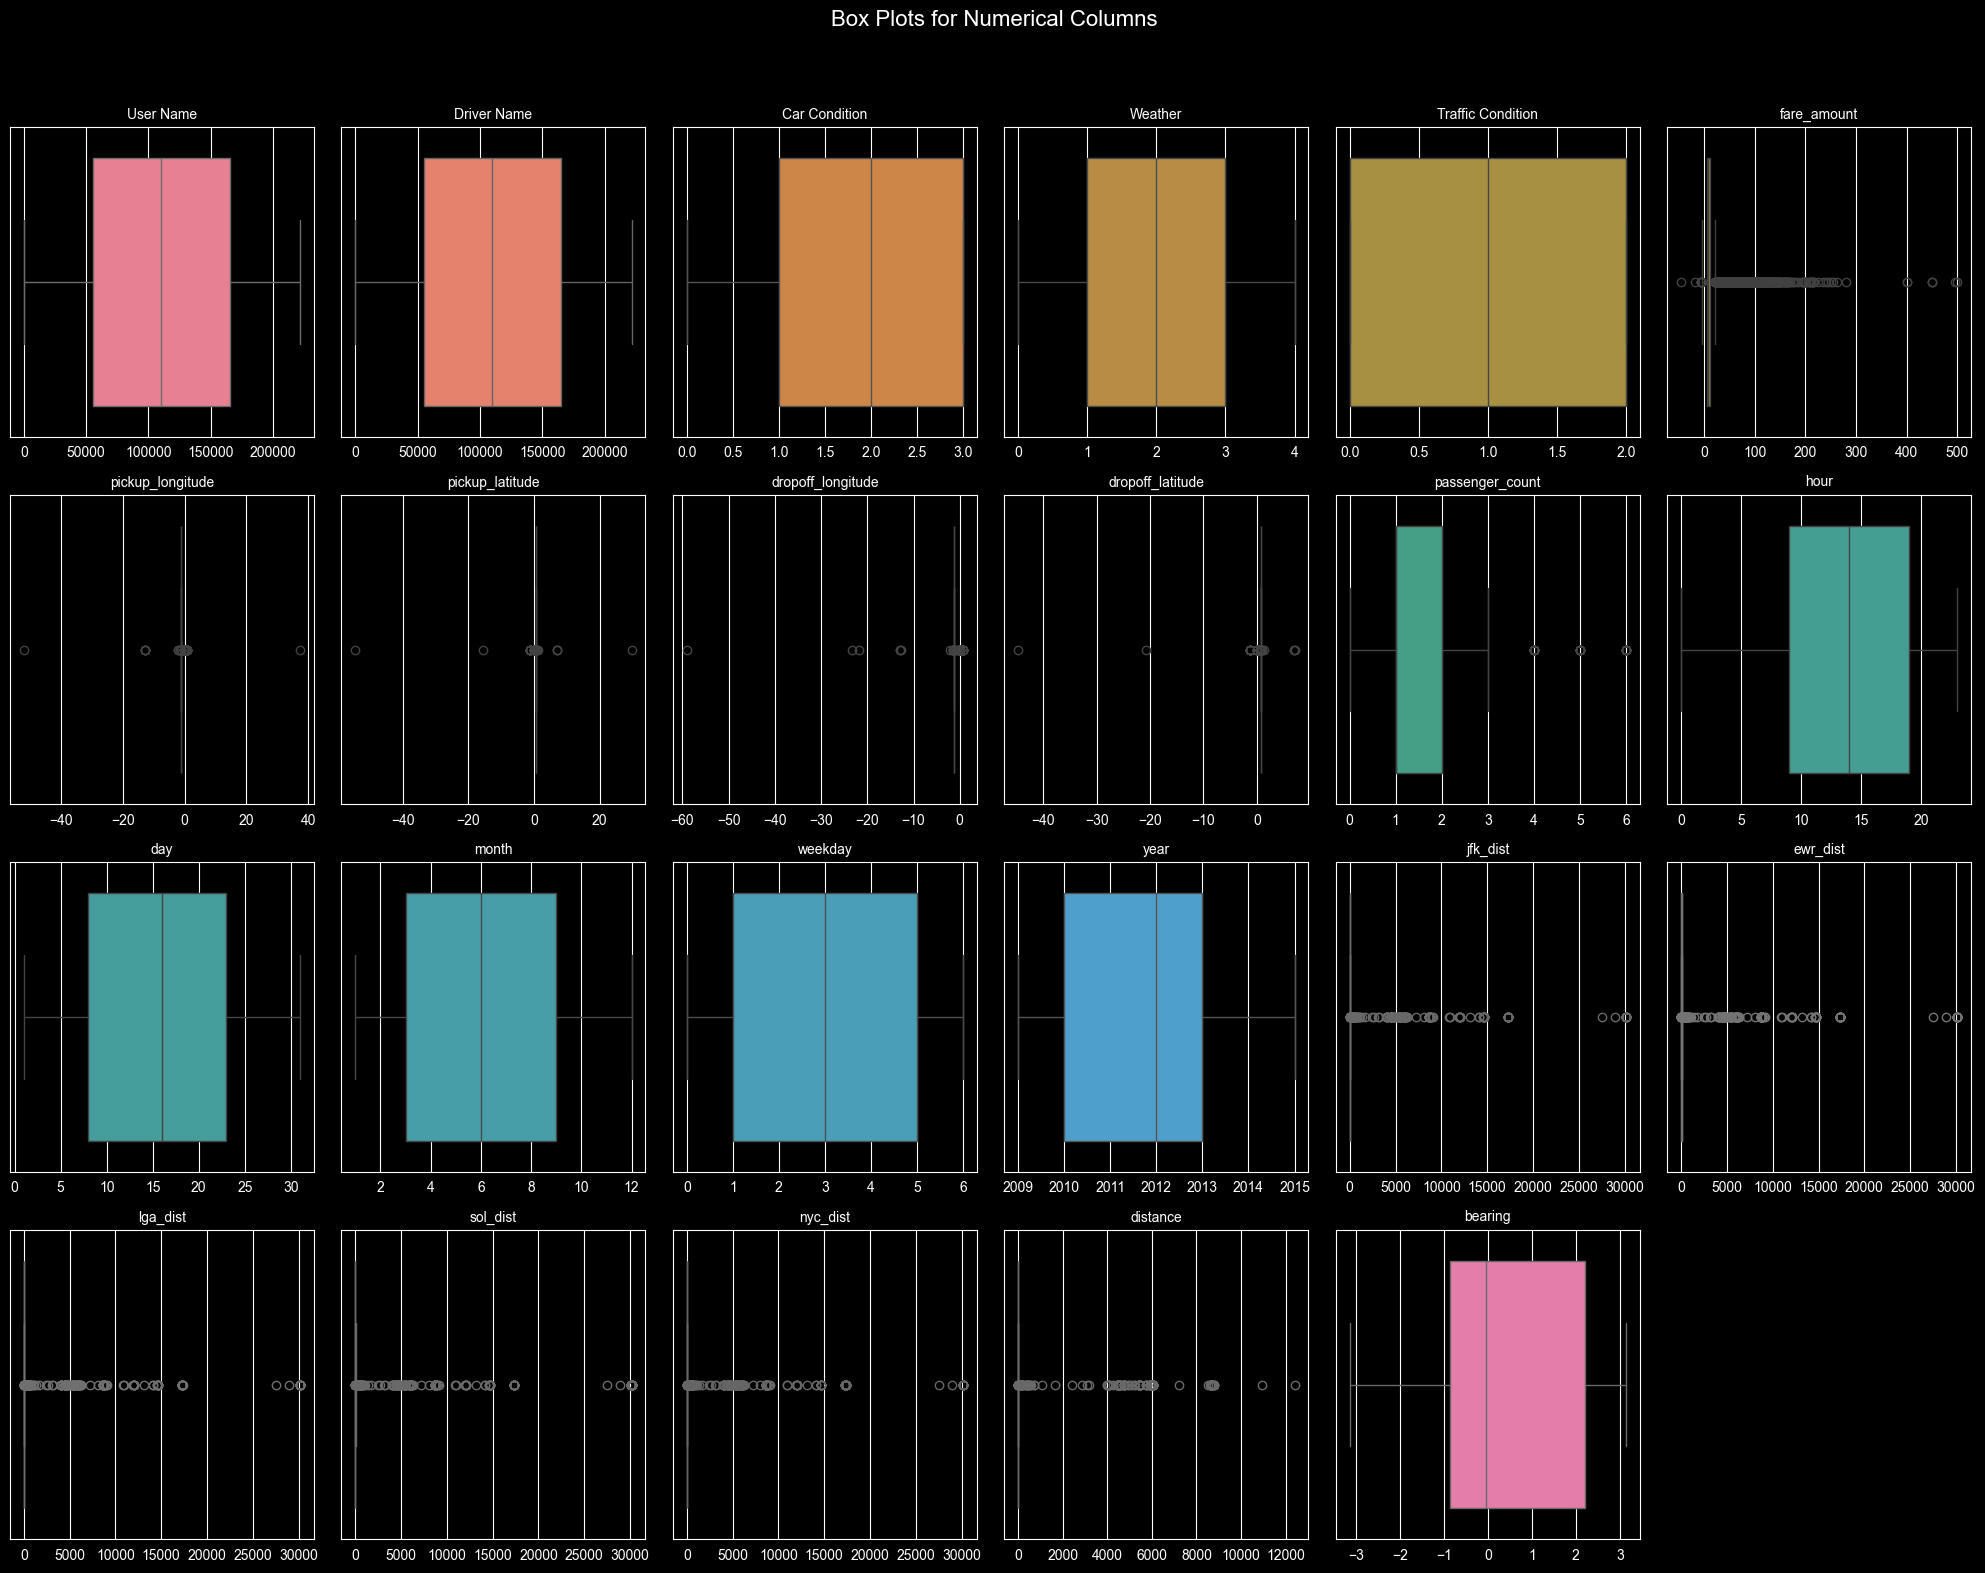

In [19]:
outliers_list = ['User Name', 'Driver Name', 'Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
                 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
                 'hour', 'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
                 'nyc_dist', 'distance', 'bearing']

def draw_box_plot(data):
    # Number of columns per row in the plot
    n_cols = 6
    # Calculate the number of rows needed
    n_rows = (len(outliers_list) + n_cols - 1) // n_cols

    # Create a figure with a grid of subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4 * n_rows))
    fig.suptitle('Box Plots for Numerical Columns', fontsize=16)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Generate random colors for each subplot
    colors = sns.color_palette("husl", len(outliers_list))  # Generate a color palette

    # Plot each numerical column
    for ax, column, color in zip(axes, outliers_list, colors):
        sns.boxplot(x=data[column], ax=ax, color=color)
        ax.set_title(column, fontsize=10)
        ax.set_xlabel('')

    # Hide any empty subplots
    for i in range(len(outliers_list), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

draw_box_plot(df_cleaned_labeled)

In [23]:
df_cleaned_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499995 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            499995 non-null  object 
 1   User Name          499995 non-null  int32  
 2   Driver Name        499995 non-null  int32  
 3   Car Condition      499995 non-null  int32  
 4   Weather            499995 non-null  int32  
 5   Traffic Condition  499995 non-null  int32  
 6   key                499995 non-null  object 
 7   fare_amount        499995 non-null  float64
 8   pickup_datetime    499995 non-null  object 
 9   pickup_longitude   499995 non-null  float64
 10  pickup_latitude    499995 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    499995 non-null  int64  
 14  hour               499995 non-null  int64  
 15  day                499995 non-null  int64  
 16  mo

In [24]:
not_columns=['User ID','key','pickup_datetime']
disturbution_list = [col for col in list(df_cleaned_labeled) if col not in not_columns]
len(disturbution_list)


23

In [20]:
def remove_outlierss(task2_data2, column):
    Q1 = task2_data2[column].quantile(0.25)
    Q3 = task2_data2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return task2_data2[(task2_data2[column] >= lower_bound) & (task2_data2[column] <= upper_bound)]
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
    return outliers_count

def count_all_outliers(data):
    outliers_counts = {}
    numerical_columns = data.select_dtypes(include='number').columns
    for col in numerical_columns:
        outliers_counts[col] = count_outliers(data, col)
    return outliers_counts

# Example usage
# Assuming task2_data2 is your DataFrame containing numerical columns
outliers_counts = count_all_outliers(df_cleaned_labeled)
print("Number of outliers for each numerical column:")
print(outliers_counts)
# Remove outliers for all numerical columns
df_clean = df_cleaned_labeled.copy()
for column in ['distance','fare_amount','passenger_count','jfk_dist']:
    df_clean = remove_outlierss(df_clean, column)

print("\nDataFrame after removing outliers for all numerical columns:")
print( df_clean.shape)

Number of outliers for each numerical column:
{'User Name': 0, 'Driver Name': 0, 'Car Condition': 0, 'Weather': 0, 'Traffic Condition': 0, 'fare_amount': 43329, 'pickup_longitude': 33965, 'pickup_latitude': 23701, 'dropoff_longitude': 35805, 'dropoff_latitude': 30748, 'passenger_count': 56526, 'hour': 0, 'day': 0, 'month': 0, 'weekday': 0, 'year': 0, 'jfk_dist': 59285, 'ewr_dist': 28380, 'lga_dist': 22539, 'sol_dist': 18610, 'nyc_dist': 21940, 'distance': 41925, 'bearing': 0}

DataFrame after removing outliers for all numerical columns:
(360496, 26)


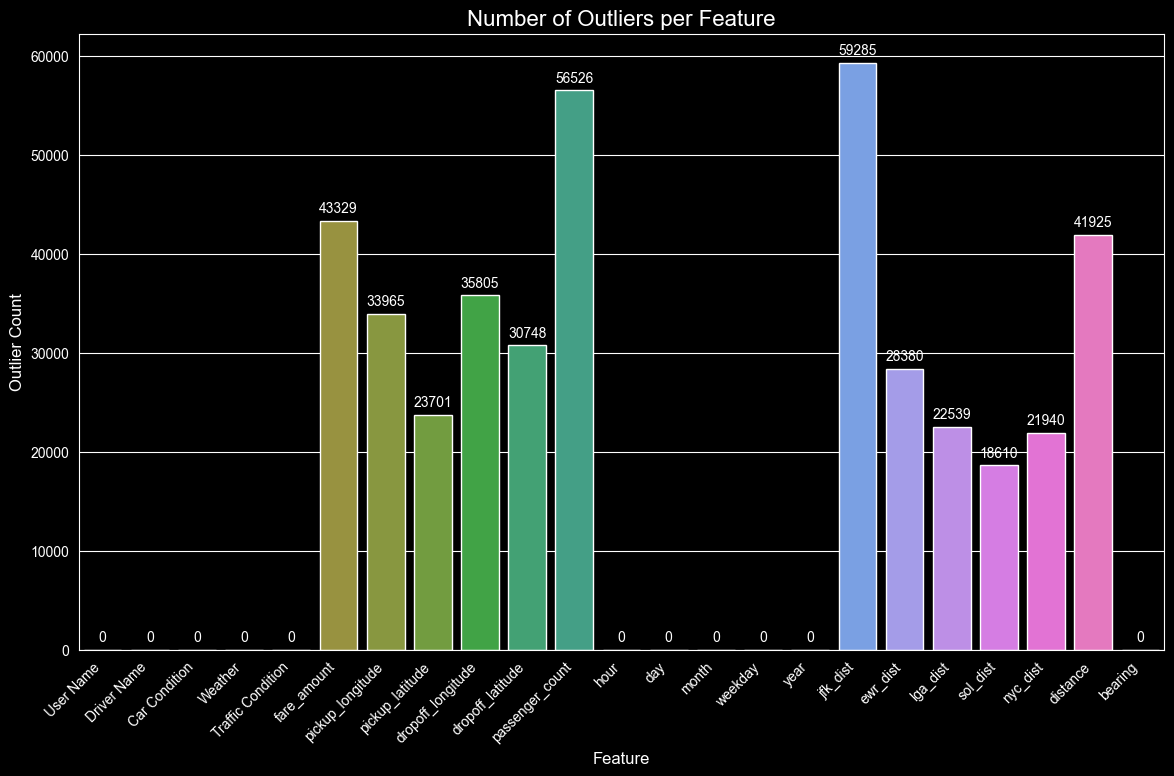

In [21]:
# Function to count outliers in each column
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
    return outliers_count

# Function to count outliers for all numerical columns
def count_all_outliers(data):
    outliers_counts = {}
    numerical_columns = data.select_dtypes(include='number').columns
    for col in numerical_columns:
        outliers_counts[col] = count_outliers(data, col)
    return outliers_counts

# Count outliers for each numerical column
outliers_counts = count_all_outliers(df_cleaned_labeled)

# Check if outliers_counts is not empty
if outliers_counts:
    # Create a DataFrame from the outliers count dictionary
    outliers_df = pd.DataFrame(list(outliers_counts.items()), columns=['Feature', 'Outlier Count'])

    # Plotting the bar plot
    plt.figure(figsize=(14, 8))

    # Use the "husl" color palette for distinct colors
    palette = sns.color_palette("husl", len(outliers_df))

    # Create bar plot
    bar_plot = sns.barplot(x='Feature', y='Outlier Count', data=outliers_df, palette=palette)

    # Add titles and labels
    plt.title('Number of Outliers per Feature', fontsize=16)
    plt.xlabel('Feature', fontsize=12)
    plt.ylabel('Outlier Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Add annotations on top of each bar
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.0f'),
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 9),
                          textcoords='offset points')

    # Show the plot
    plt.show()
else:
    print("No outliers found or the DataFrame is empty.")

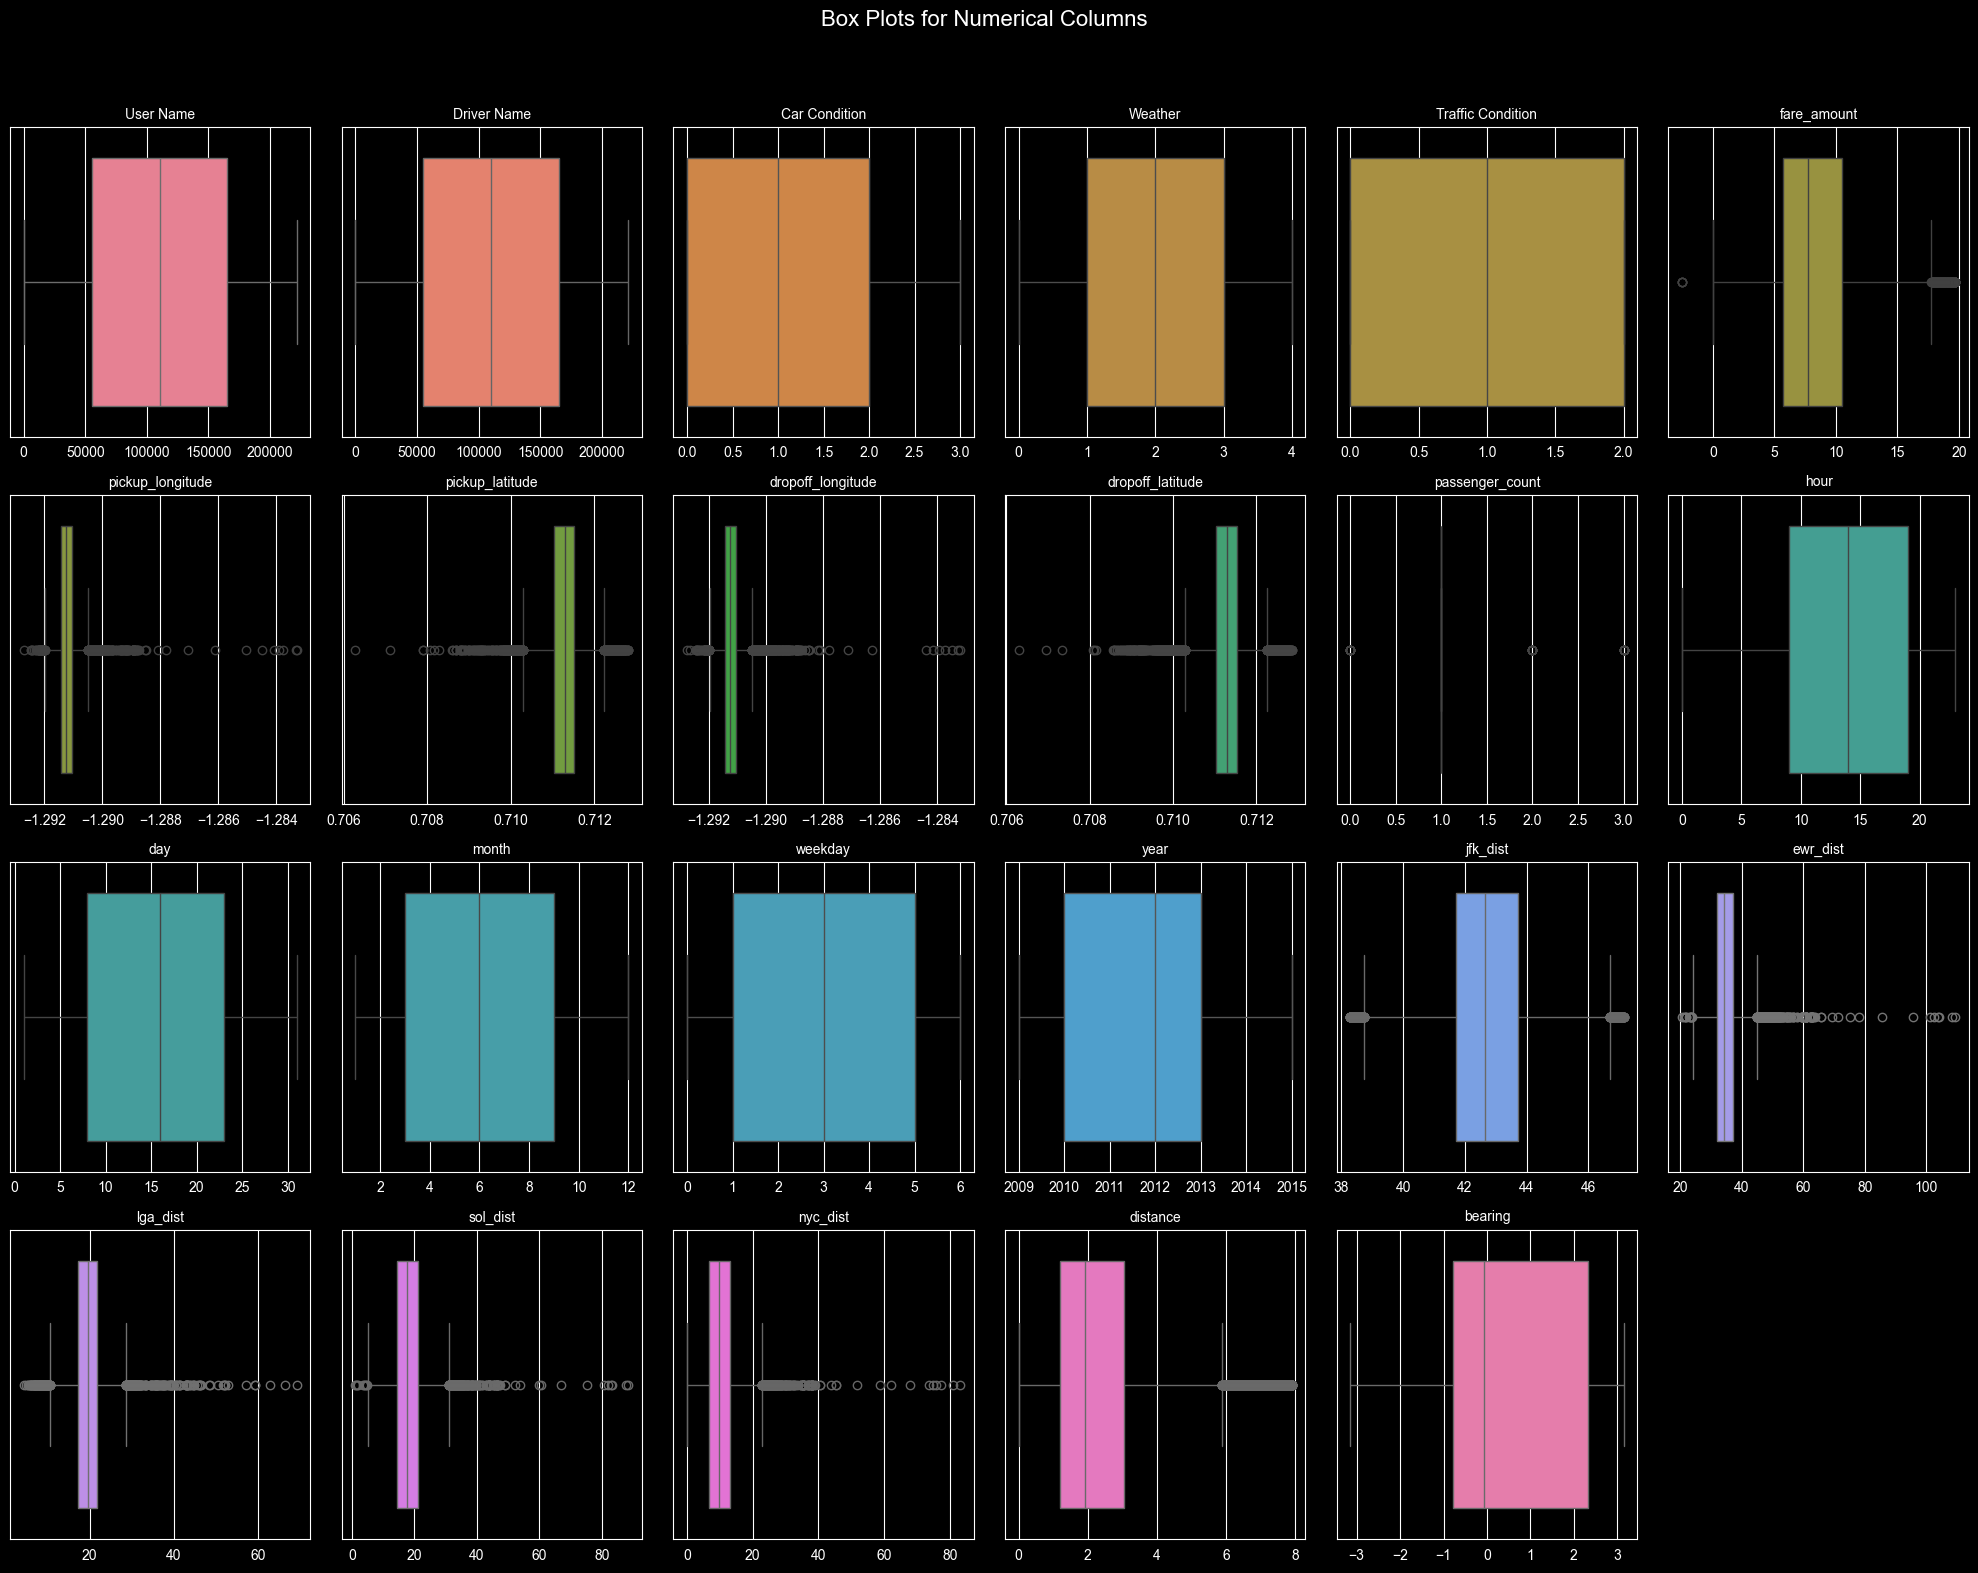

In [22]:
draw_box_plot(df_clean)

# **Pie and Dounuts**

traffic condiions


In [ ]:
data.shape

(500000, 26)

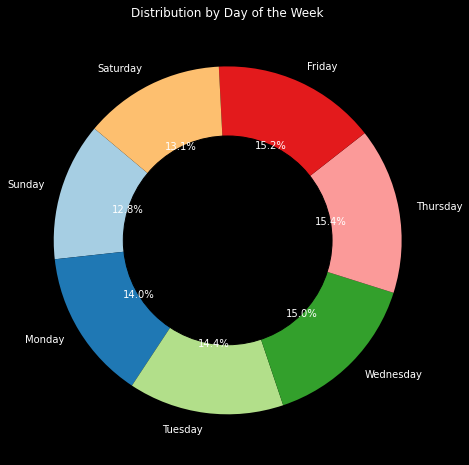

0    64237
1    69929
2    72230
3    74776
4    77224
5    76212
6    65387
Name: weekday, dtype: int64


In [22]:
day_counts = df_cleaned['weekday'].value_counts().sort_index()

# Define the mapping for display purposes
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
#labels=[day_names[i] for i in day_counts.index]
day_counts.index
# Plotting the donut chart
plt.figure(figsize=(10, 8))
plt.pie(day_counts, labels=[day_names[i] for i in day_counts.index],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(day_counts))))
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='black'))  # Create the 'donut' hole
plt.title('Distribution by Day of the Week')
plt.show()
print(day_counts )

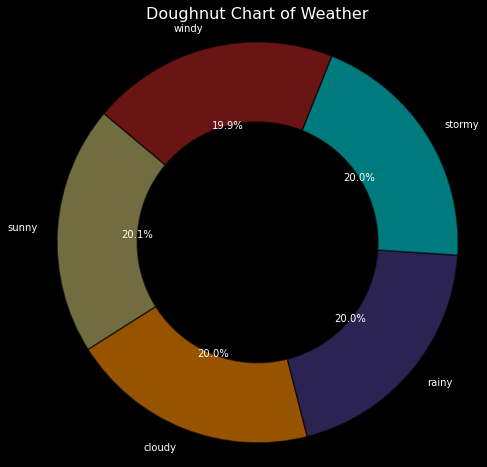

In [23]:
count_0_1 = df_cleaned['Weather'].value_counts()
# Define colors using seaborn's pastel palette or custom colors
colors = ['#bdb76b', '#ff8c00', '#483d8b', '#00ced1','#b22222']

# Create a figure
plt.figure(figsize=(8, 8))

# Create the pie chart and add a hole in the center
plt.pie(
    count_0_1,
    labels=count_0_1.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='black', linewidth=1.5, alpha=0.6)
)

# Add a title
plt.title('Doughnut Chart of Weather', fontsize=16)

# Ensure the chart is a circle
plt.axis('equal')

# Show the plot
plt.show()

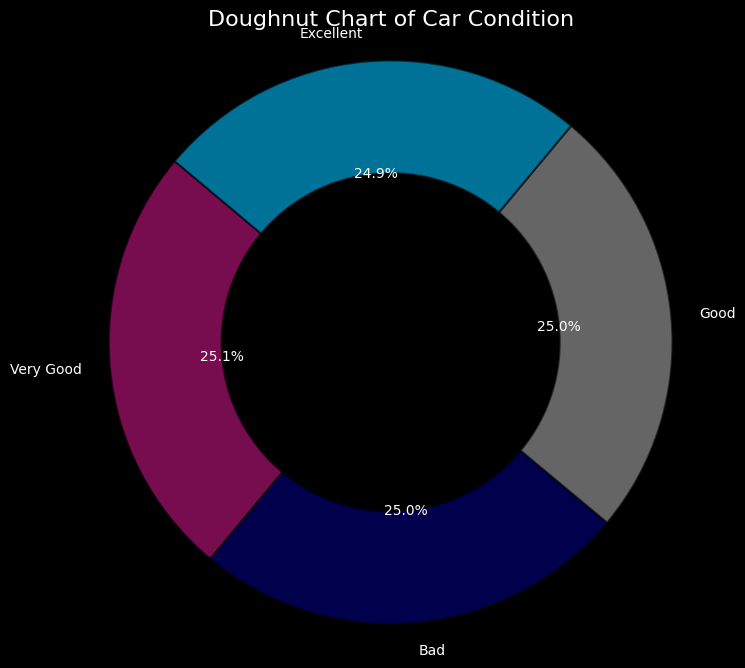

In [ ]:
count_0_1 = df_cleaned['Car Condition'].value_counts()

# Define colors using seaborn's pastel palette or custom colors
colors = ['#c71585', '#000080', '#a9a9a9', '#00bfff']

# Create a figure
plt.figure(figsize=(8, 8))

# Create the pie chart and add a hole in the center
plt.pie(
    count_0_1,
    labels=count_0_1.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='black', linewidth=1.5, alpha=0.6)
)

# Add a title
plt.title('Doughnut Chart of Car Condition', fontsize=16)

# Ensure the chart is a circle
plt.axis('equal')

# Show the plot
plt.show()

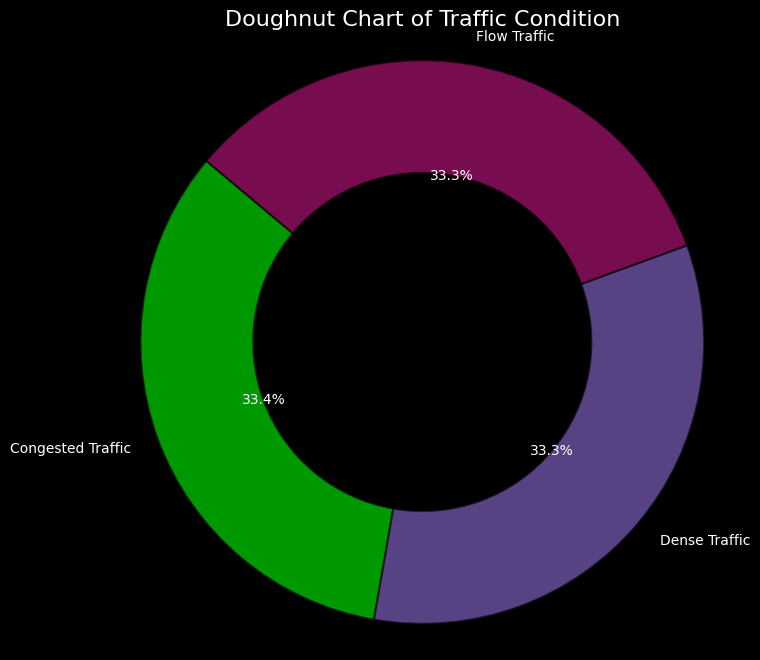

In [ ]:
count_0_1 = df_cleaned['Traffic Condition'].value_counts()
# Define colors using seaborn's pastel palette or custom colors
colors = ['#00ff00', '#9370db', '#c71585']

# Create a figure
plt.figure(figsize=(8, 8))

# Create the pie chart and add a hole in the center
plt.pie(
    count_0_1,
    labels=count_0_1.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='black', linewidth=1.5, alpha=0.6)
)

# Add a title
plt.title('Doughnut Chart of Traffic Condition', fontsize=16)

# Ensure the chart is a circle
plt.axis('equal')

# Show the plot
plt.show()

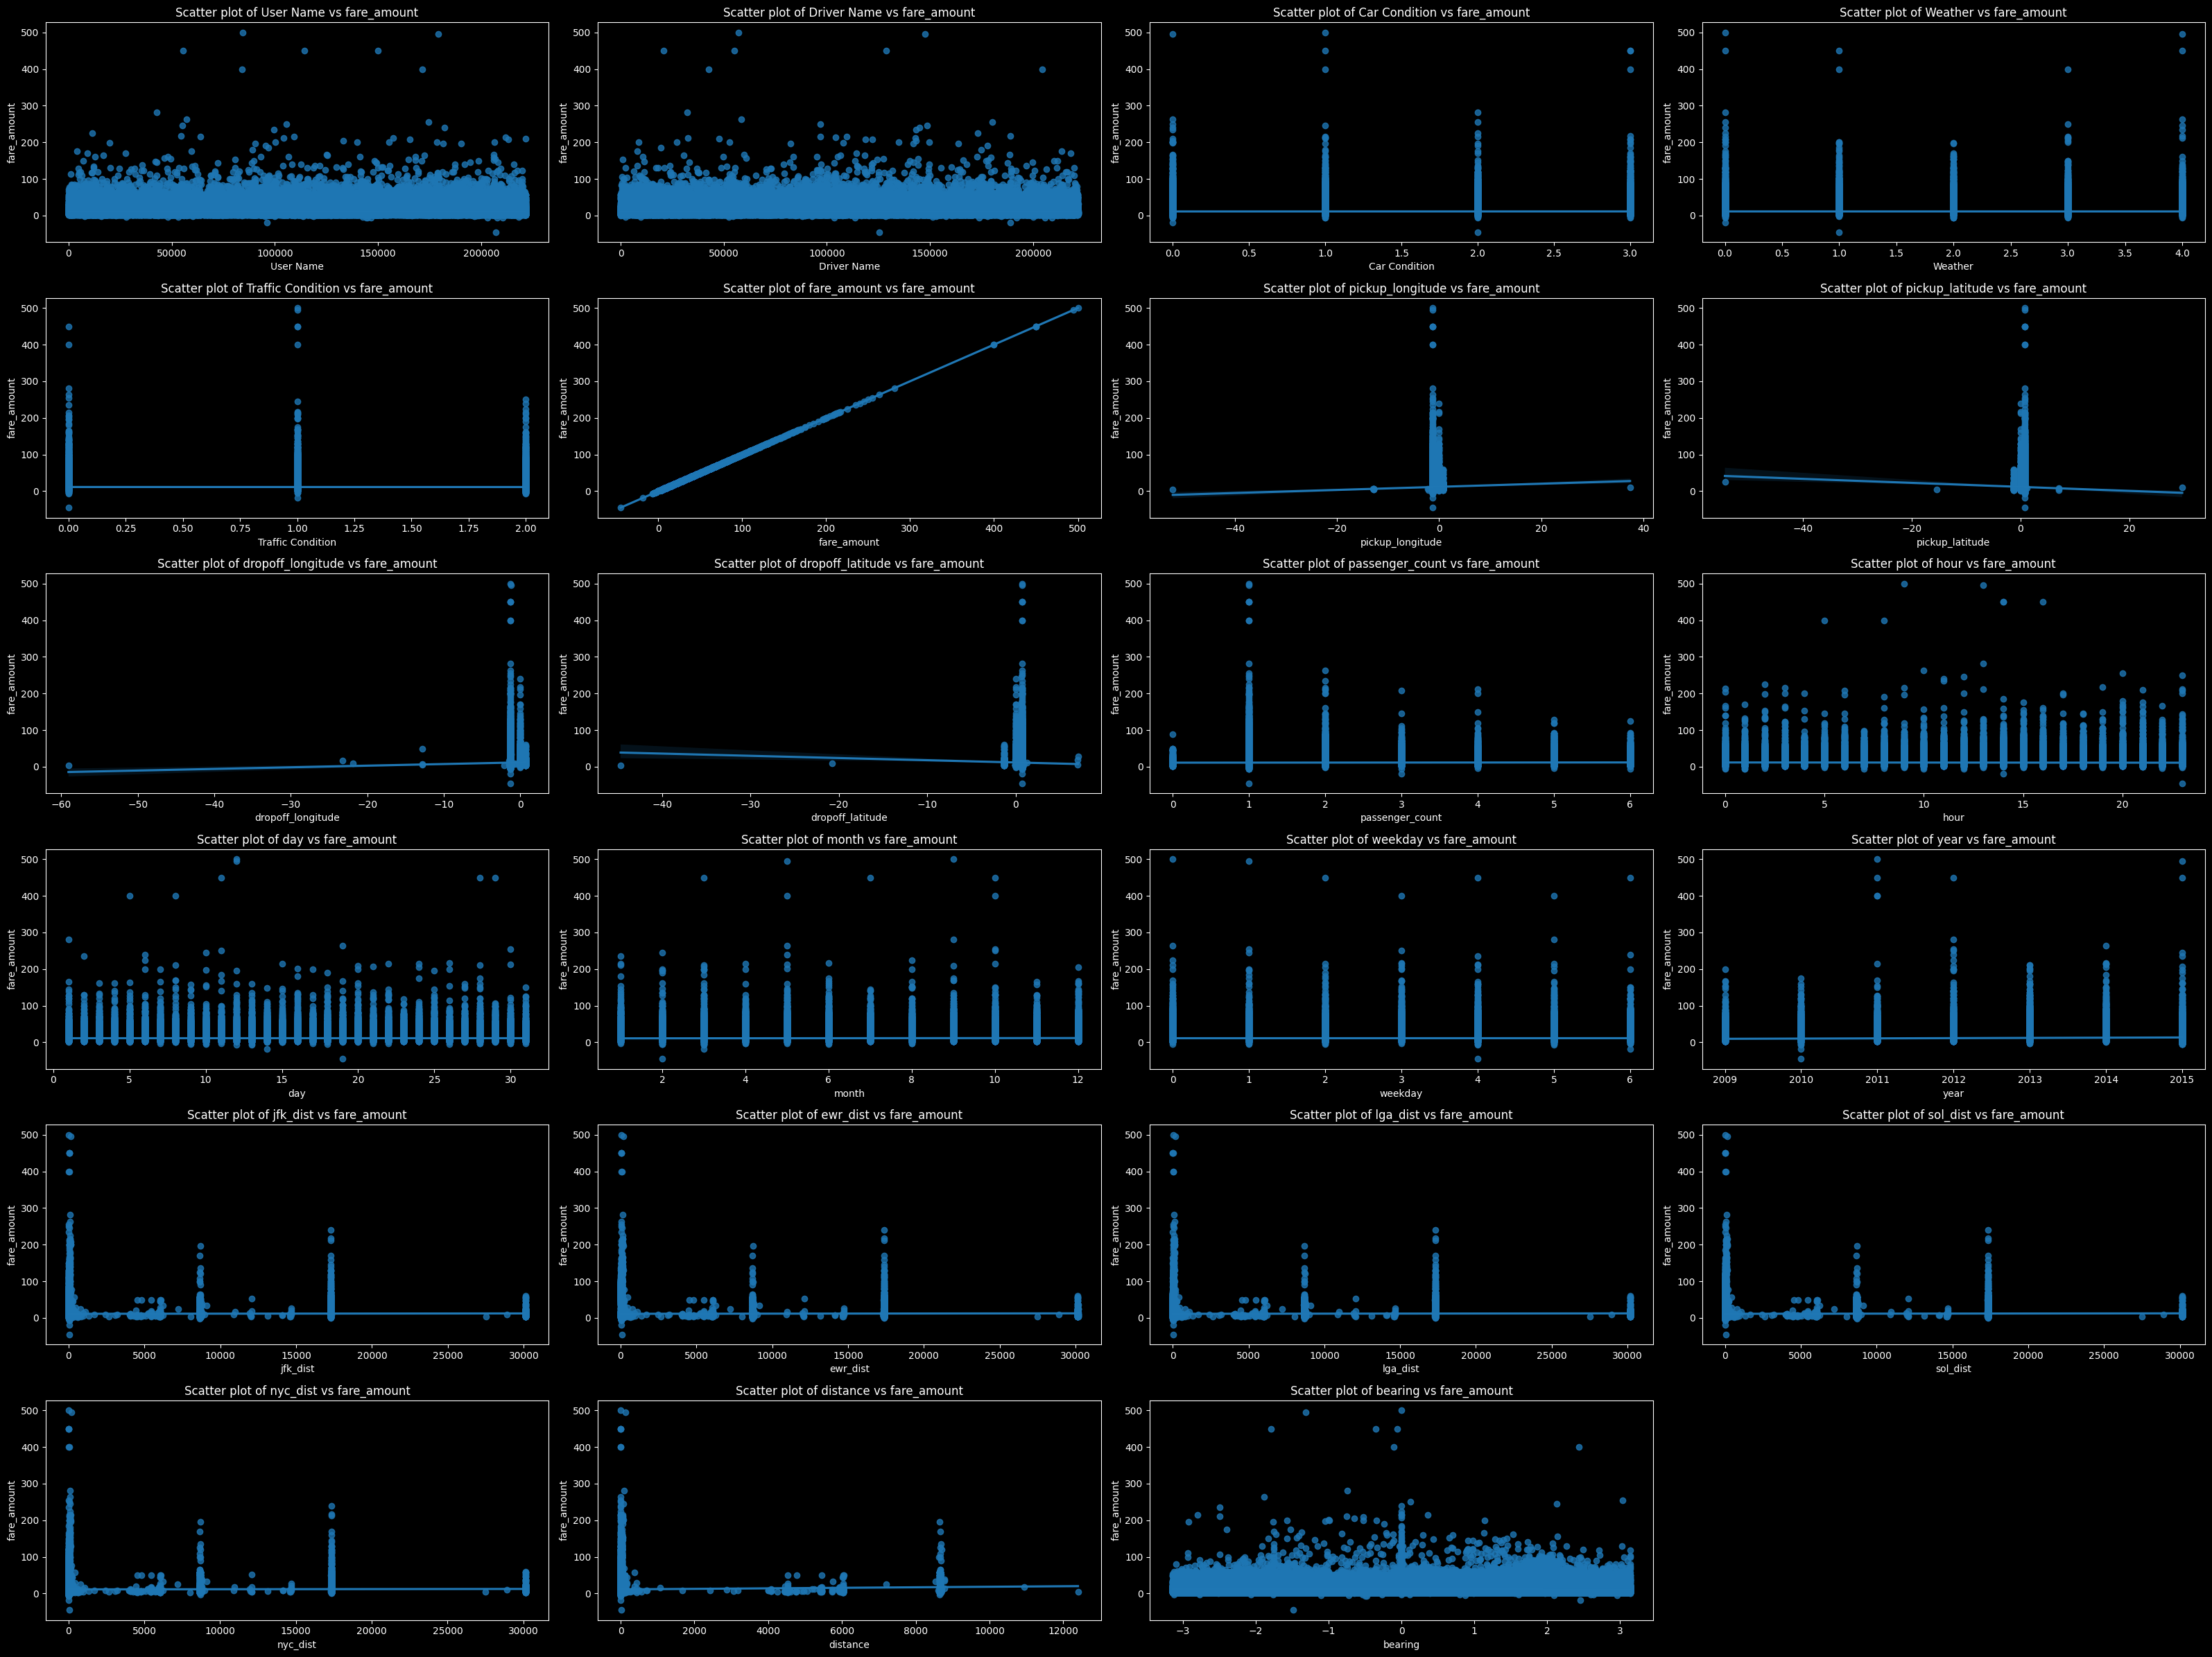

In [ ]:
target_col = 'fare_amount'  # Assuming this is the correct column name

num_cols = len(disturbution_list)
cols_per_row = 4
rows = (num_cols - 1) // cols_per_row + 1

# Create a figure
plt.figure(figsize=(32, 24))

# Iterate over each feature and plot
for i, col in enumerate(disturbution_list):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.regplot(x=col, y=target_col, data=df_cleaned_labeled, color='#1f77b4')  # Set color for consistency
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.title(f'Scatter plot of {col} vs {target_col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Important Histogarms


Drivers

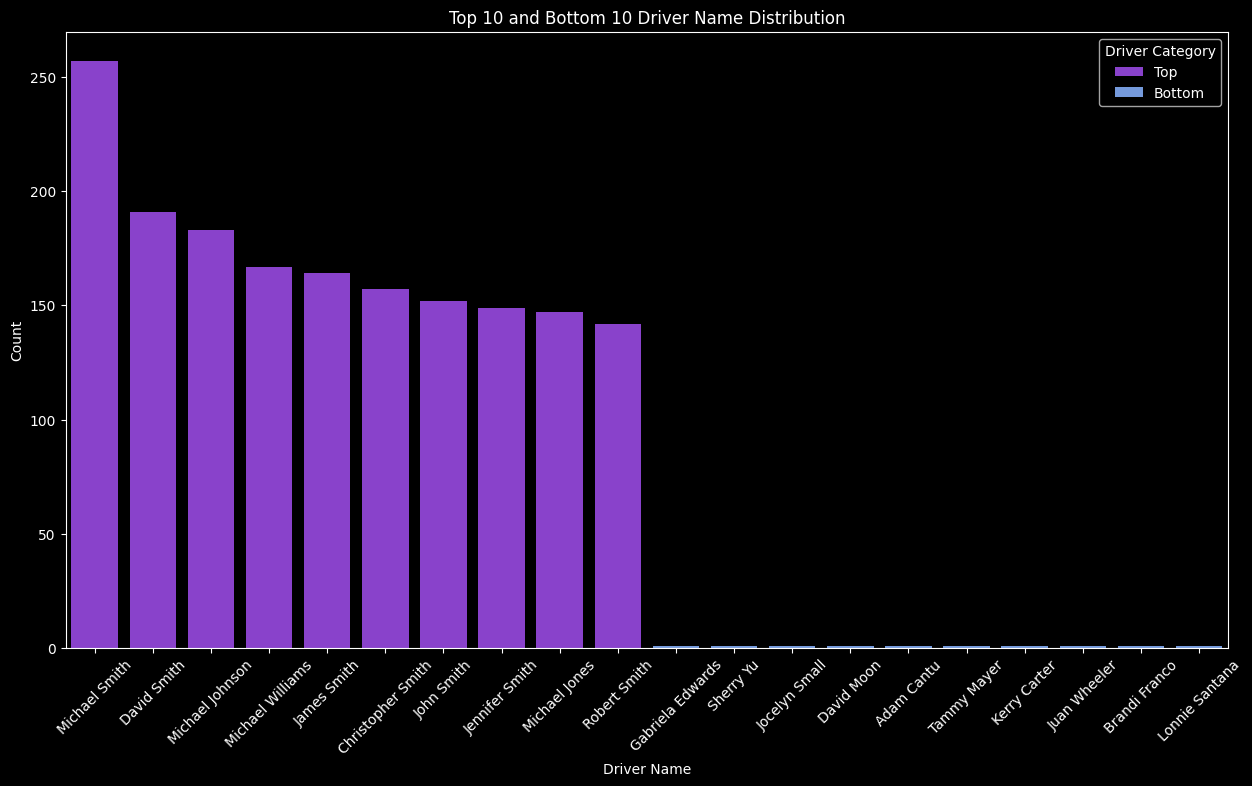

The most frequently used driver is 'Michael Smith' with 257 occurrences.
The least frequently used driver is 'Monica Villegas' with 1 occurrences.


In [ ]:
driver_counts = df_cleaned['Driver Name'].value_counts()
most_frequent_driver = driver_counts.idxmax()
most_frequent_count = driver_counts.max()
least_frequent_driver = driver_counts.idxmin()
least_frequent_count = driver_counts.min()

# Get top 10 and bottom 10 drivers
top_10_drivers = driver_counts.head(10)
bottom_10_drivers = driver_counts.tail(10)

combined_drivers = pd.concat([top_10_drivers, bottom_10_drivers])

# Create labels for the drivers: Top or Bottom
driver_labels = ['Top'] * 10 + ['Bottom'] * 10

# Create a new DataFrame for plotting
df_plot = pd.DataFrame({
    'Driver Name': combined_drivers.index,
    'Count': combined_drivers.values,
    'Label': driver_labels
})

# Plotting the histogram
plt.figure(figsize=(15, 8))

sns.barplot(
    data=df_plot,
    x='Driver Name',
    y='Count',
    hue='Label',
    dodge=False,
    palette={'Top': '#8a2be2', 'Bottom': '#6495ed'}
)

# Add titles and labels
plt.title('Top 10 and Bottom 10 Driver Name Distribution')
plt.xlabel('Driver Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate driver names for better readability
plt.legend(title='Driver Category')

# Show the plot
plt.show()

# Print the most frequently used driver name
print(f"The most frequently used driver is '{most_frequent_driver}' with {most_frequent_count} occurrences.")
print(f"The least frequently used driver is '{least_frequent_driver}' with {least_frequent_count} occurrences.")


In [ ]:
driver_counts = df_cleaned['Driver Name'].value_counts()

# Identify the minimum count value
min_count_value = driver_counts.min()

# Get all drivers with the minimum count
min_count_drivers = driver_counts[driver_counts == min_count_value]

# Get top 10 drivers
top_10_drivers = driver_counts.head(10)

# Combine top 10 drivers with those having the minimum count
combined_drivers = pd.concat([top_10_drivers, min_count_drivers])

# Create labels for the drivers: Top or Min Count
driver_labels = ['Top'] * len(top_10_drivers) + ['Min Count'] * len(min_count_drivers)
print
# Create a new DataFrame for plotting
df_plot = pd.DataFrame({
    'Driver Name': combined_drivers.index,
    'Count': combined_drivers.values,
    'Label': driver_labels
})

# Plotting the histogram
'''plt.figure(figsize=(15, 8))

sns.barplot(
    data=df_plot,
    x='Driver Name',
    y='Count',
    hue='Label',
    dodge=False,
    palette={'Top': '#8a2be2', 'Min Count': '#ff6347'}
)

# Add titles and labels
plt.title('Top Drivers and Drivers with Minimum Count Distribution')
plt.xlabel('Driver Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate driver names for better readability
plt.legend(title='Driver Category')

# Adjust y-axis limits
plt.ylim(0, max(df_plot['Count']) * 1.1)  # Add a bit of space above the highest bar

# Show the plot
plt.show()'''

# Print the most and least frequently used driver names
most_frequent_driver = driver_counts.idxmax()
most_frequent_count = driver_counts.max()
least_frequent_driver = driver_counts.idxmin()
least_frequent_count = driver_counts.min()

print(f"The most frequently used driver is '{most_frequent_driver}' with {most_frequent_count} occurrences.")
print(f"The least frequently used driver is '{least_frequent_driver}' with {least_frequent_count} occurrences.")

The most frequently used driver is 'Michael Smith' with 257 occurrences.
The least frequently used driver is 'Monica Villegas' with 1 occurrences.


Users

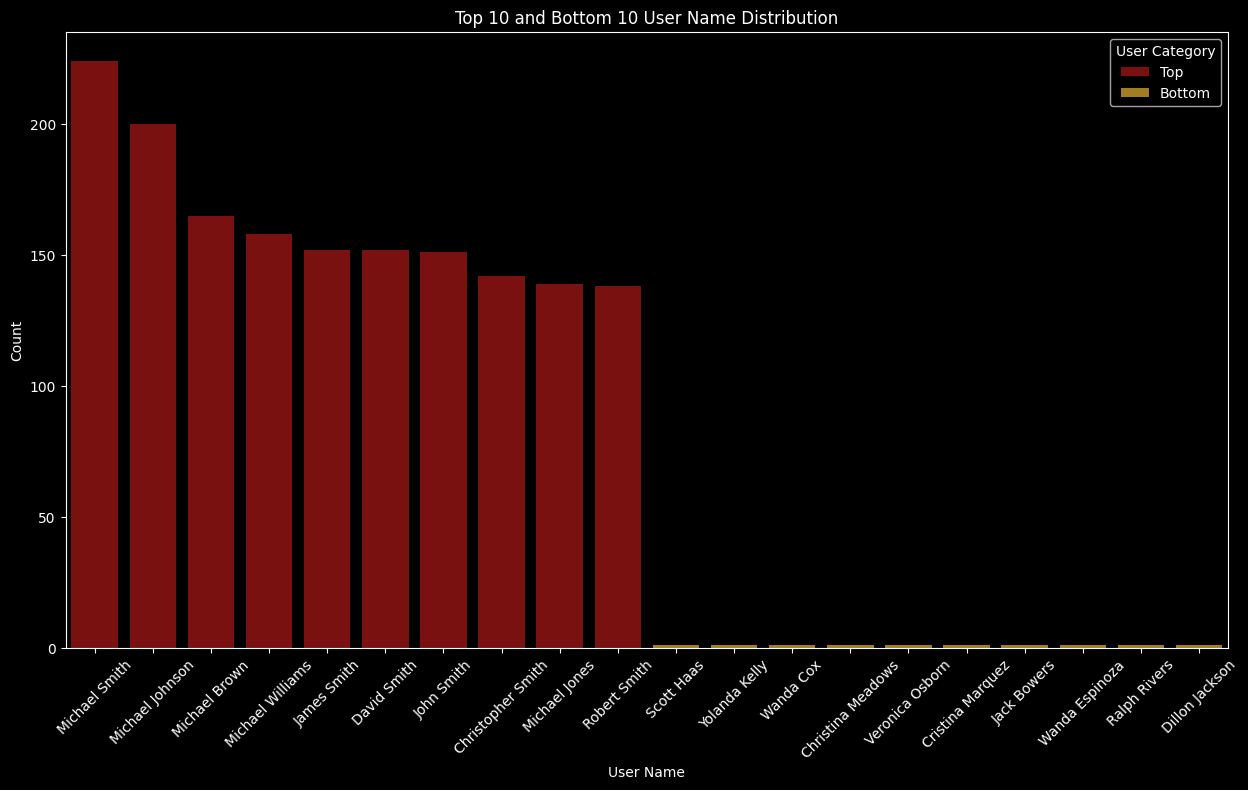

The most frequently user is 'Michael Smith' with 224 occurrences.
The least frequently user is 'Danielle Richards DVM' with 1 occurrences.


In [ ]:
Users_counts = df_cleaned['User Name'].value_counts()
most_frequent_user = Users_counts.idxmax()
most_frequent_count = Users_counts.max()
least_frequent_user= Users_counts.idxmin()
least_frequent_count = Users_counts.min()

# Get top 10 and bottom 10 users
top_10_users = Users_counts.head(10)
bottom_10_users = Users_counts.tail(10)

combined_users = pd.concat([top_10_users, bottom_10_users])

# Create labels for the drivers: Top or Bottom
Users_labels = ['Top'] * 10 + ['Bottom'] * 10

# Create a new DataFrame for plotting
df_plot = pd.DataFrame({
    'User Name':combined_users.index,
    'Count': combined_users.values,
    'Label': Users_labels
})

# Plotting the histogram
plt.figure(figsize=(15, 8))

sns.barplot(
    data=df_plot,
    x='User Name',
    y='Count',
    hue='Label',
    dodge=False,
    palette={'Top': '#8b0000', 'Bottom': '#b8860b'}
)

# Add titles and labels
plt.title('Top 10 and Bottom 10 User Name Distribution')
plt.xlabel('User Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate driver names for better readability
plt.legend(title='User Category')

# Show the plot
plt.show()

# Print the most frequently used driver name
print(f"The most frequently user is '{most_frequent_user}' with {most_frequent_count} occurrences.")
print(f"The least frequently user is '{least_frequent_user}' with {least_frequent_count} occurrences.")


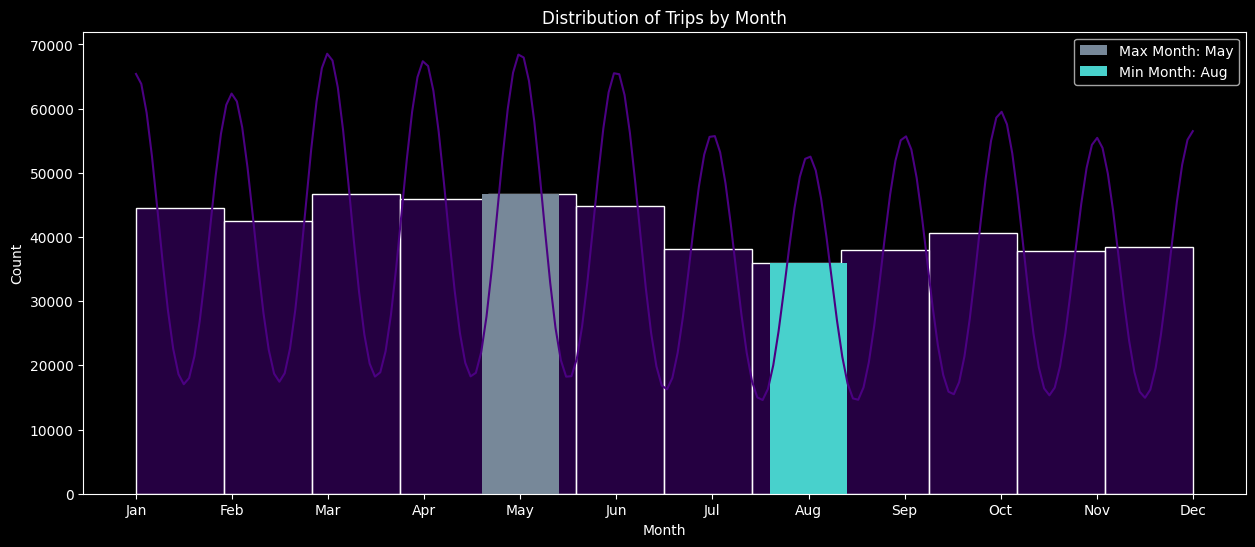

Counts for each month:
Jan: 44547
Feb: 42454
Mar: 46714
Apr: 45959
May: 46733
Jun: 44827
Jul: 38127
Aug: 35871
Sep: 37979
Oct: 40551
Nov: 37757
Dec: 38476


In [ ]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_counts = df_cleaned['month'].value_counts().sort_index()
df_cleaned['month'] = df_cleaned['month'].astype(int)
max_month = month_counts.idxmax()
max_count = month_counts.max()
min_month = month_counts.idxmin()
min_count = month_counts.min()
# Plotting the histogram
plt.figure(figsize=(15, 6))
sns.histplot(df_cleaned['month'], bins=12, kde=True, color='#4b0082')
plt.bar(max_month , max_count, color='#778899', label=f'Max Month: {month_names[max_month-1]}')
plt.bar(min_month , min_count, color='#48d1cc', label=f'Min Month: {month_names[min_month-1]}')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Trips by Month')
plt.xticks(range(1, 13), month_names)
plt.legend()

# Add titles and labels
# Show the plot
plt.show()
print("Counts for each month:")

for i, count in enumerate(month_counts):
    print(f"{month_names[i]}: {count}")

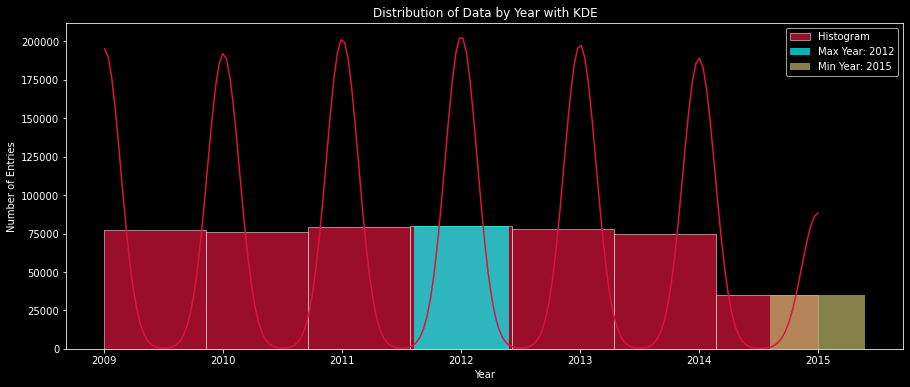

Counts for each year:
2009: 77002
2010: 75791
2011: 79528
2012: 80222
2013: 78033
2014: 74608
2015: 34811


In [27]:
year_counts = df_cleaned['year'].value_counts().sort_index()
# Identify the year with the maximum count
max_year = year_counts.idxmax()
max_count = year_counts.max()
min_year = year_counts.idxmin()
min_count = year_counts.min()
# Plotting the histogram with KDE and highlighted max year
plt.figure(figsize=(15, 6))

# Plot histogram and KDE
sns.histplot(df_cleaned['year'], bins=len(year_counts), kde=True, color='#dc143c', alpha=0.7, linewidth=0.5, label='Histogram')
# Highlight the max year
plt.bar(max_year, max_count, color='#00ffff', label=f'Max Year: {max_year}', alpha=0.7)
plt.bar(min_year, min_count, color='#bdb76b', label=f'Min Year: {min_year}', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Data by Year with KDE')
plt.xlabel('Year')
plt.ylabel('Number of Entries')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Print counts for each year
print("Counts for each year:")
for year, count in year_counts.items():
    print(f"{year}: {count}")

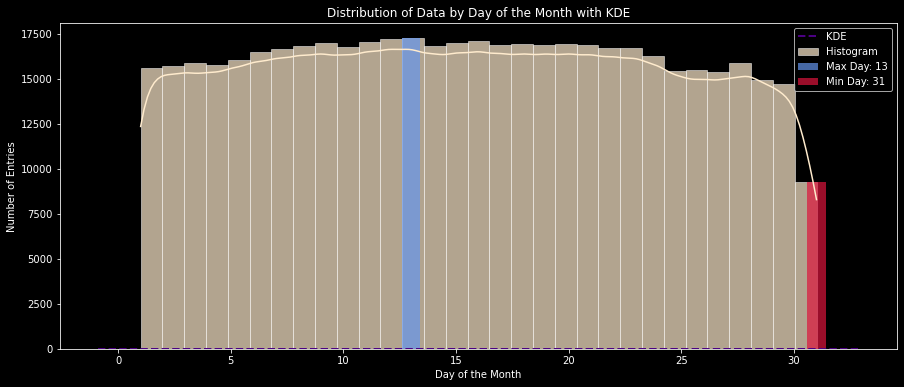

In [28]:
day_counts = df_cleaned['day'].value_counts().sort_index()

# Identify the day with the maximum and minimum count
max_day = day_counts.idxmax()
max_count = day_counts.max()
min_day = day_counts.idxmin()
min_count = day_counts.min()

# Plotting the histogram with KDE and highlighted max and min days
plt.figure(figsize=(15, 6))

# Plot histogram and KDE
sns.histplot(df_cleaned['day'], bins=31, kde=True, color='#ffebcd', alpha=0.7, linewidth=0.5, label='Histogram')
sns.kdeplot(df_cleaned['day'], color='#4b0082', linewidth=2, label='KDE', linestyle='--')

# Highlight the max and min day
plt.bar(max_day, max_count, color='#6495ed', label=f'Max Day: {max_day}', alpha=0.7)
plt.bar(min_day, min_count, color='#dc143c', label=f'Min Day: {min_day}', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Data by Day of the Month with KDE')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Entries')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Print counts for each day


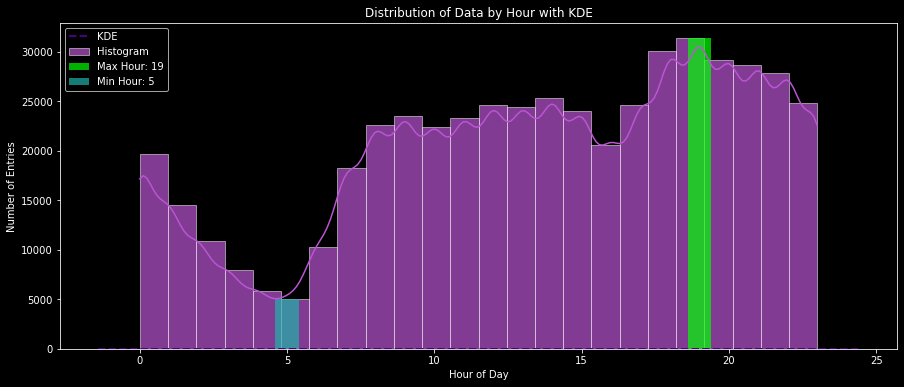

Counts for each hour:
0: 19650
1: 14556
2: 10884
3: 7936
4: 5864
5: 4982
6: 10326
7: 18231
8: 22599
9: 23565
10: 22428
11: 23338
12: 24649
13: 24404
14: 25385
15: 24025
16: 20569
17: 24646
18: 30063
19: 31382
20: 29193
21: 28639
22: 27817
23: 24864


In [29]:
hour_counts = df_cleaned['hour'].value_counts().sort_index()

# Identify the hour with the maximum and minimum count
max_hour = hour_counts.idxmax()
max_count = hour_counts.max()
min_hour = hour_counts.idxmin()
min_count = hour_counts.min()

# Plotting the histogram with KDE and highlighted max and min hours
plt.figure(figsize=(15, 6))

# Plot histogram and KDE
sns.histplot(df_cleaned['hour'], bins=24, kde=True, color='#ba55d3', alpha=0.7, linewidth=0.5, label='Histogram')
sns.kdeplot(df_cleaned['hour'], color='#4b0082', linewidth=2, label='KDE', linestyle='--')

# Highlight the max and min hour
plt.bar(max_hour, max_count, color='#00ff00', label=f'Max Hour: {max_hour}', alpha=0.7)
plt.bar(min_hour, min_count, color='#20b2aa', label=f'Min Hour: {min_hour}', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Data by Hour with KDE')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Entries')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Print counts for each hour
print("Counts for each hour:")
for hour, count in hour_counts.items():
    print(f"{hour}: {count}")

In [30]:
df_cleaned.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

# Relations with fare amount

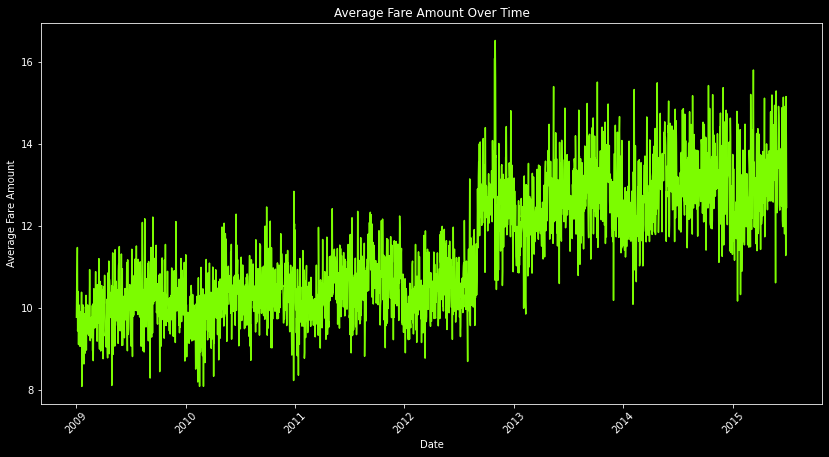

In [31]:
df_cleaned['pickup_datetime'] = pd.to_datetime(df_cleaned['pickup_datetime'])

# Set the datetime column as the index
df_cleaned.set_index('pickup_datetime', inplace=True)

# Resample by day and calculate the mean fare amount
daily_fare = df_cleaned['fare_amount'].resample('D').mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=daily_fare.index, y=daily_fare.values, color='#7cfc00')
plt.title('Average Fare Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Fare Amount')
plt.xticks(rotation=45)
plt.show()

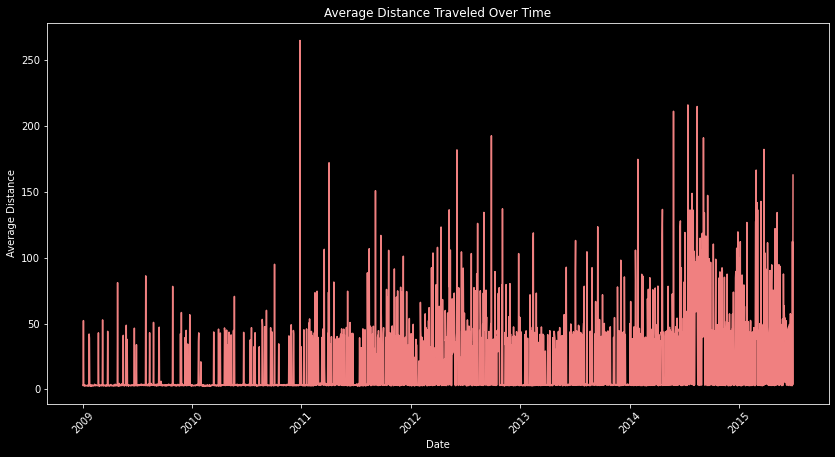

In [32]:
daily_distance = df_cleaned['distance'].resample('D').mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=daily_distance.index, y=daily_distance.values, color='#f08080')
plt.title('Average Distance Traveled Over Time')
plt.xlabel('Date')
plt.ylabel('Average Distance')
plt.xticks(rotation=45)
plt.show()

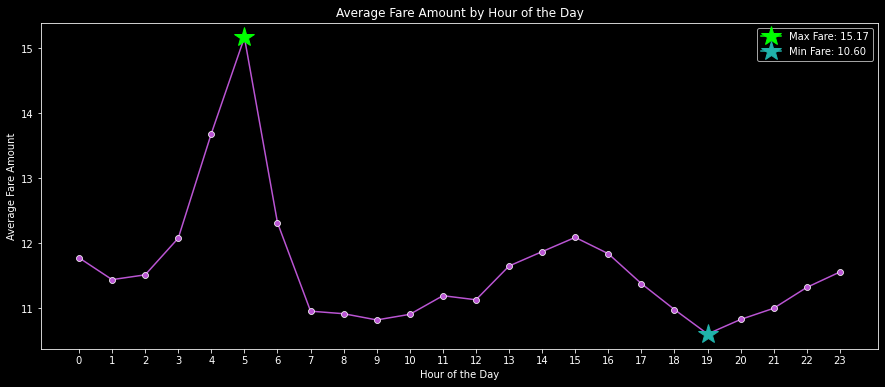

In [33]:
plt.figure(figsize=(15, 6))

# Aggregate fare amounts by hour
hourly_fare = df_cleaned.groupby('hour')['fare_amount'].mean().reset_index()

# Plotting the line plot
sns.lineplot(x='hour', y='fare_amount', data=hourly_fare, marker='o', color='#ba55d3')

# Identify the hours with the maximum and minimum average fare amount
max_hour = hourly_fare.loc[hourly_fare['fare_amount'].idxmax()]
min_hour = hourly_fare.loc[hourly_fare['fare_amount'].idxmin()]

# Highlight the maximum fare amount with a star
plt.plot(max_hour['hour'], max_hour['fare_amount'], marker='*', markersize=20, color='#00ff00',label=f'Max Fare: {max_hour["fare_amount"]:.2f}')

# Highlight the minimum fare amount with a star
plt.plot(min_hour['hour'], min_hour['fare_amount'], marker='*', markersize=20, color='#20b2aa',label=f'Min Fare: {min_hour["fare_amount"]:.2f}')

# Add titles and labels
plt.title('Average Fare Amount by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount')

plt.xticks(range(24))  # Ensure all hours are displayed on the x-axis
plt.grid(False)

# Add legend
plt.legend()

# Show the plot
plt.show()


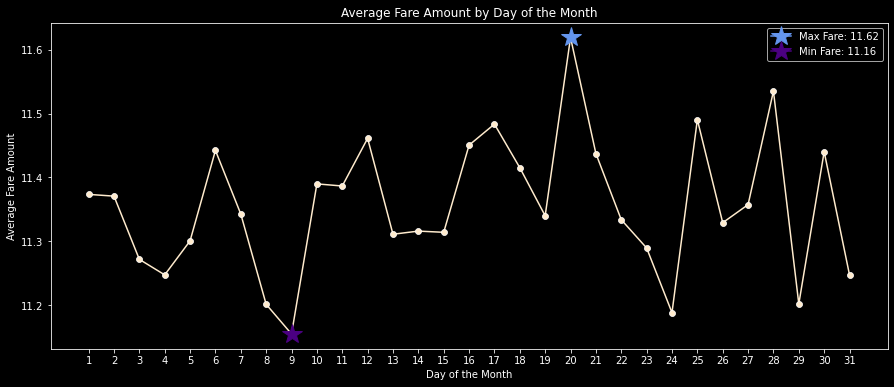

In [34]:
plt.figure(figsize=(15, 6))

# Aggregate fare amounts by day of the month
daily_fare = df_cleaned.groupby('day')['fare_amount'].mean().reset_index()

# Plotting the line plot
sns.lineplot(x='day', y='fare_amount', data=daily_fare, marker='o', color='#ffebcd')

# Identify the days with the maximum and minimum average fare amount
max_day = daily_fare.loc[daily_fare['fare_amount'].idxmax()]
min_day = daily_fare.loc[daily_fare['fare_amount'].idxmin()]

# Highlight the maximum fare amount with a star
plt.plot(max_day['day'], max_day['fare_amount'], marker='*', markersize=20, color='#6495ed', label=f'Max Fare: {max_day["fare_amount"]:.2f}')

# Highlight the minimum fare amount with a star
plt.plot(min_day['day'], min_day['fare_amount'], marker='*', markersize=20, color='#4b0082', label=f'Min Fare: {min_day["fare_amount"]:.2f}')

# Add titles and labels
plt.title('Average Fare Amount by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Fare Amount')

plt.xticks(range(1, 32))  # Ensure all days are displayed on the x-axis
plt.grid(False )

# Add legend
plt.legend()

# Show the plot
plt.show()



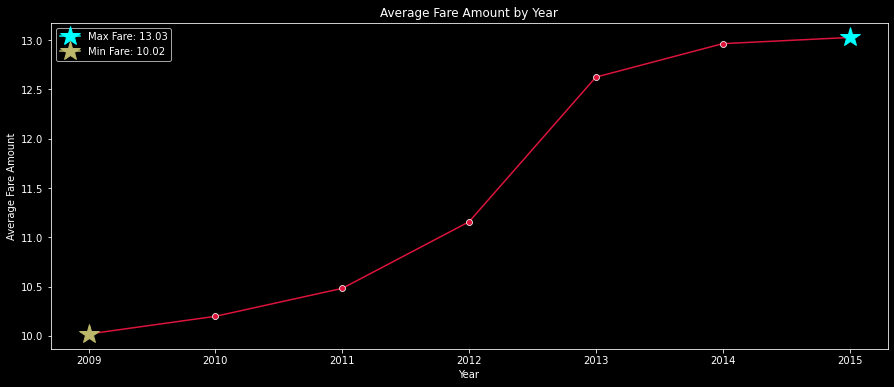

In [38]:


yearly_fare = df_cleaned.groupby('year')['fare_amount'].mean().reset_index()

# Plotting the line plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='fare_amount', data=yearly_fare, marker='o', color='#dc143c')

# Identify the years with the maximum and minimum average fare amount
max_year = yearly_fare.loc[yearly_fare['fare_amount'].idxmax()]
min_year = yearly_fare.loc[yearly_fare['fare_amount'].idxmin()]

# Highlight the maximum fare amount with a star
plt.plot(max_year['year'], max_year['fare_amount'], marker='*', markersize=20, color='#00ffff', label=f'Max Fare: {max_year["fare_amount"]:.2f}')

# Highlight the minimum fare amount with a star
plt.plot(min_year['year'], min_year['fare_amount'], marker='*', markersize=20, color='#bdb76b', label=f'Min Fare: {min_year["fare_amount"]:.2f}')

# Add titles and labels
plt.title('Average Fare Amount by Year')
plt.xlabel('Year')
plt.ylabel('Average Fare Amount')

# Ensure all years are displayed on the x-axis
plt.xticks(yearly_fare['year'])

plt.grid(False)

# Add legend
plt.legend()

# Show the plot
plt.show()


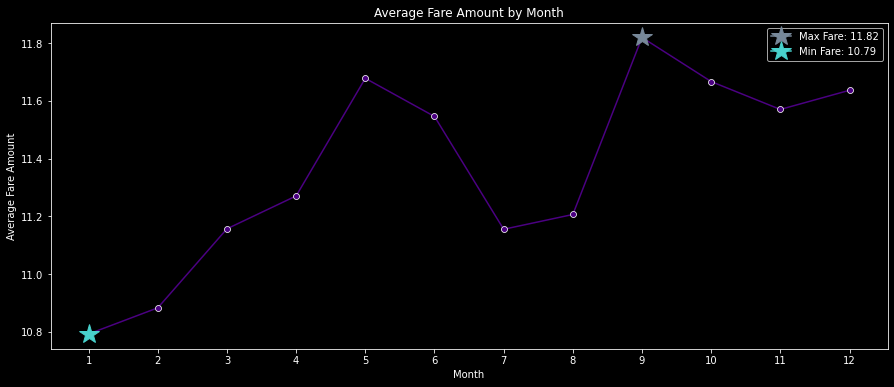

In [39]:
plt.figure(figsize=(15, 6))

# Aggregate fare amounts by month
monthly_fare = df_cleaned.groupby('month')['fare_amount'].mean().reset_index()

# Plotting the line plot
sns.lineplot(x='month', y='fare_amount', data=monthly_fare, marker='o', color='#4b0082')

# Identify the months with the maximum and minimum average fare amount
max_month = monthly_fare.loc[monthly_fare['fare_amount'].idxmax()]
min_month = monthly_fare.loc[monthly_fare['fare_amount'].idxmin()]

# Highlight the maximum fare amount with a star
plt.plot(max_month['month'], max_month['fare_amount'], marker='*', markersize=20, color='#778899', label=f'Max Fare: {max_month["fare_amount"]:.2f}')

# Highlight the minimum fare amount with a star
plt.plot(min_month['month'], min_month['fare_amount'], marker='*', markersize=20, color='#48d1cc', label=f'Min Fare: {min_month["fare_amount"]:.2f}')

# Add titles and labels
plt.title('Average Fare Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Fare Amount')

plt.xticks(range(1, 13))  # Ensure all months are displayed on the x-axis
plt.grid(False)

# Add legend
plt.legend()

# Show the plot
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


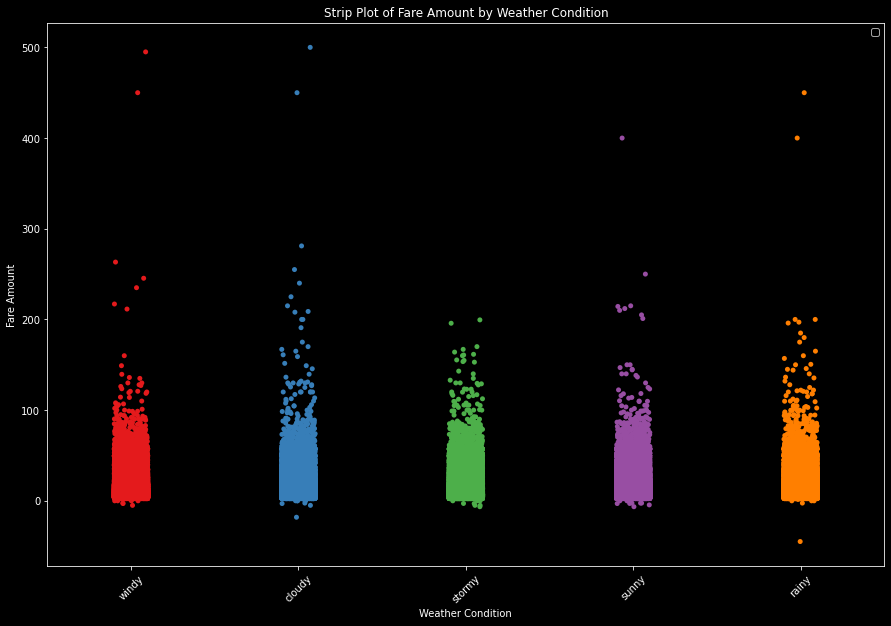

Maximum fare amount: 500.0 in weather condition: cloudy
Minimum fare amount: -44.9 in weather condition: rainy


In [111]:
# Strip Plot for Weather Condition
plt.figure(figsize=(15, 10))

sns.stripplot(
    x='Weather',
    y='fare_amount',
    data=df_cleaned,
    jitter=True,
    palette='Set1'
)

# Identify the row with the maximum and minimum fare amounts
max_fare_index = df_cleaned['fare_amount'].idxmax()
max_fare_weather = df_cleaned.iloc[max_fare_index]

min_fare_index = df_cleaned['fare_amount'].idxmin()
min_fare_weather = df_cleaned.iloc[min_fare_index]


# Add titles and labels
plt.title('Strip Plot of Fare Amount by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Fare Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.show()

# Print the maximum and minimum fare amounts with their weather conditions
max_fare = max_fare_weather['fare_amount']
max_fare_W = max_fare_weather['Weather']
min_fare = min_fare_weather['fare_amount']
min_fare_W = min_fare_weather['Weather']

print(f"Maximum fare amount: {max_fare} in weather condition: {max_fare_W}")
print(f"Minimum fare amount: {min_fare} in weather condition: {min_fare_W}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


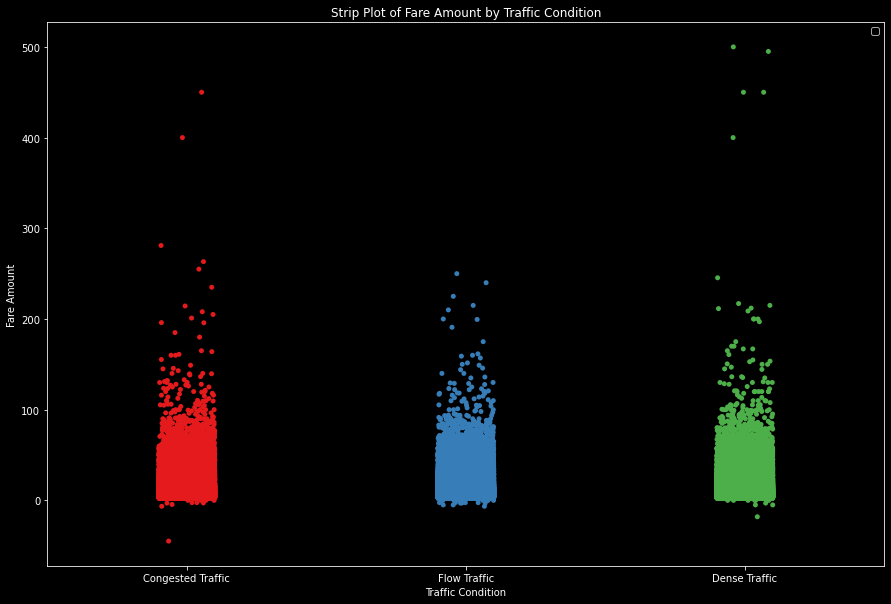

Maximum fare amount: 500.0 in traffic condition: Dense Traffic
Minimum fare amount: -44.9 in traffic condition: Congested Traffic


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Strip Plot for Traffic Condition
plt.figure(figsize=(15, 10))
sns.stripplot(
    x='Traffic Condition',
    y='fare_amount',
    data=df_cleaned,
    jitter=True,
    palette='Set1'
)
plt.title('Strip Plot of Fare Amount by Traffic Condition')
plt.xlabel('Traffic Condition')
plt.ylabel('Fare Amount')
plt.grid(False)

# Identify the row with the maximum fare amount
max_fare_index = df_cleaned['fare_amount'].idxmax()
max_fare_row = df_cleaned.iloc[max_fare_index]
max_fare = max_fare_row['fare_amount']
max_fare_traffic_condition = max_fare_row['Traffic Condition']


# Identify the row with the minimum fare amount
min_fare_index = df_cleaned['fare_amount'].idxmin()
min_fare_row = df_cleaned.iloc[min_fare_index]
min_fare = min_fare_row['fare_amount']
min_fare_traffic_condition = min_fare_row['Traffic Condition']

#
# Add legend
plt.legend()

# Show the plot
plt.show()

# Print the maximum and minimum fare amounts with their traffic conditions
print(f"Maximum fare amount: {max_fare} in traffic condition: {max_fare_traffic_condition}")
print(f"Minimum fare amount: {min_fare} in traffic condition: {min_fare_traffic_condition}")

# Ad


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


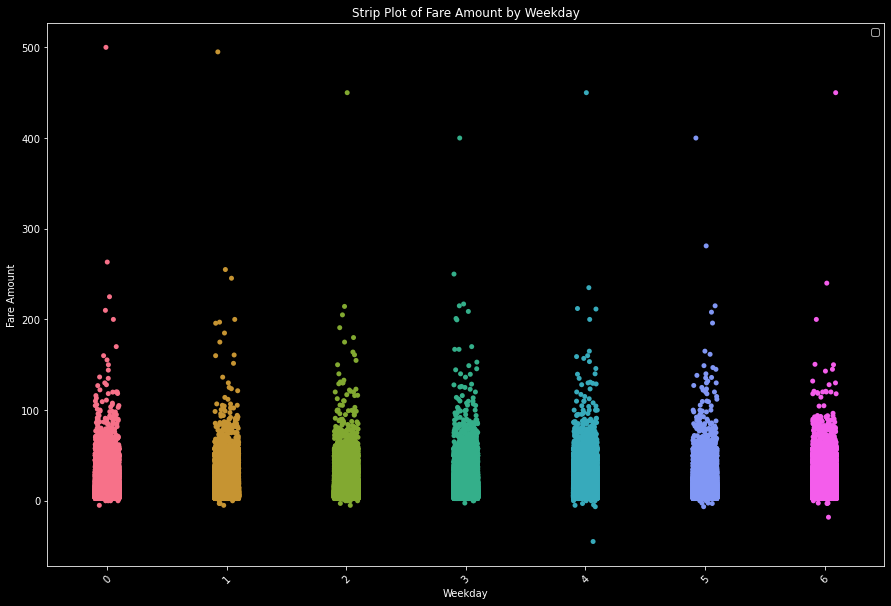

Maximum fare amount: 500.0 on weekday: 0
Minimum fare amount: -44.9 on weekday: 4


In [114]:
plt.figure(figsize=(15, 10))
sns.stripplot(
    x='weekday',
    y='fare_amount',
    data=df_cleaned,
    jitter=True,
    palette='husl'
)

# Identify the row with the maximum fare amount
max_fare_index = df_cleaned['fare_amount'].idxmax()
max_fare_row = df_cleaned.iloc[max_fare_index]
max_fare = max_fare_row['fare_amount']
max_fare_weekday = max_fare_row['weekday']


# Identify the row with the minimum fare amount
min_fare_index = df_cleaned['fare_amount'].idxmin()
min_fare_row = df_cleaned.iloc[min_fare_index]
min_fare = min_fare_row['fare_amount']
min_fare_weekday = min_fare_row['weekday']


# Add titles and labels
plt.title('Strip Plot of Fare Amount by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Fare Amount')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.grid(False)
plt.show()

# Print the maximum and minimum fare amounts with their weekdays
print(f"Maximum fare amount: {max_fare} on weekday: {max_fare_weekday}")
print(f"Minimum fare amount: {min_fare} on weekday: {min_fare_weekday}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


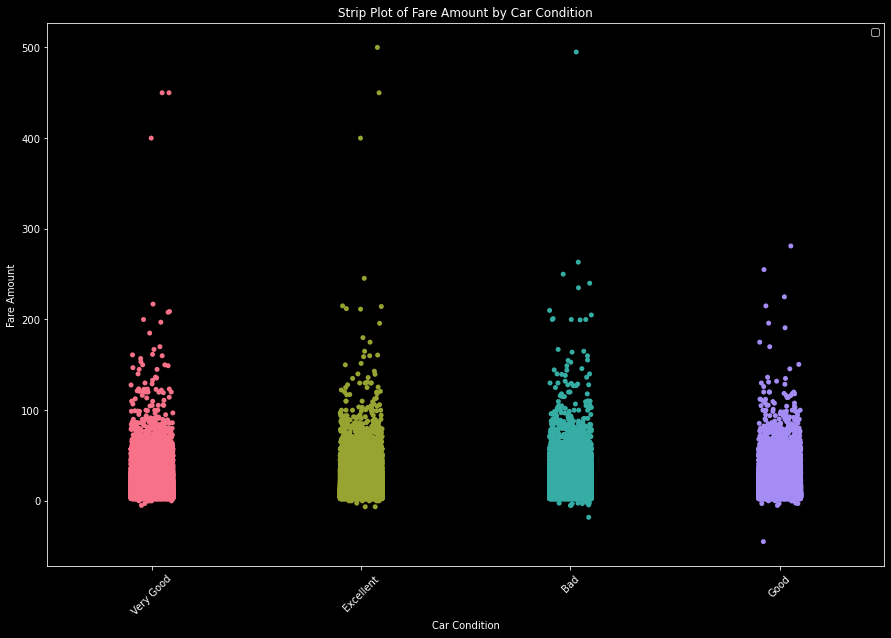

Maximum fare amount: 500.0 with car condition: Excellent
Minimum fare amount: -44.9 with car condition: Good


In [60]:

plt.figure(figsize=(15, 10))
sns.stripplot(
    x='Car Condition',
    y='fare_amount',
    data=df_cleaned,
    jitter=True,
    palette='husl'
)

# Identify the row with the maximum fare amount
max_fare_index = df_cleaned['fare_amount'].idxmax()
max_fare_row = df_cleaned.iloc[max_fare_index]
max_fare = max_fare_row['fare_amount']
max_fare_car_condition = max_fare_row['Car Condition']

# Identify the row with the minimum fare amount
min_fare_index = df_cleaned['fare_amount'].idxmin()
min_fare_row = df_cleaned.iloc[min_fare_index]
min_fare = min_fare_row['fare_amount']
min_fare_car_condition = min_fare_row['Car Condition']


# Add titles and labels
plt.title('Strip Plot of Fare Amount by Car Condition')
plt.xlabel('Car Condition')
plt.ylabel('Fare Amount')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.grid(False)
plt.show()

# Print the maximum and minimum fare amounts with their car conditions
print(f"Maximum fare amount: {max_fare} with car condition: {max_fare_car_condition}")
print(f"Minimum fare amount: {min_fare} with car condition: {min_fare_car_condition}")


In [124]:
print(min_fare_row)

pickup_datetime              2010-02-19 23:47:10
User ID                                 qQslVvYu
User Name                          Tiffany Lloyd
Driver Name                      Kristin Roberts
Car Condition                               Good
Weather                                    rainy
Traffic Condition              Congested Traffic
key                  2010-02-19 23:47:10.0000002
fare_amount                                -44.9
pickup_longitude                       -1.289294
pickup_latitude                         0.711639
dropoff_longitude                      -1.285898
dropoff_latitude                        0.711866
passenger_count                                1
hour                                          23
day                                           19
month                                          2
weekday                                        4
year                                        2010
jfk_dist                               35.323185
ewr_dist            

In [61]:
print(max_fare_row)

User ID                                 fQUfaZnP
User Name                     Hector Christensen
Driver Name                        Deborah Lopez
Car Condition                          Excellent
Weather                                   cloudy
Traffic Condition                  Dense Traffic
key                  2011-09-12 09:33:56.0000004
fare_amount                                500.0
pickup_datetime              2011-09-12 09:33:56
pickup_longitude                        -1.29095
pickup_latitude                         0.709312
dropoff_longitude                       -1.29095
dropoff_latitude                        0.709312
passenger_count                                1
hour                                           9
day                                           12
month                                          9
weekday                                        0
year                                        2011
jfk_dist                               31.569506
ewr_dist            

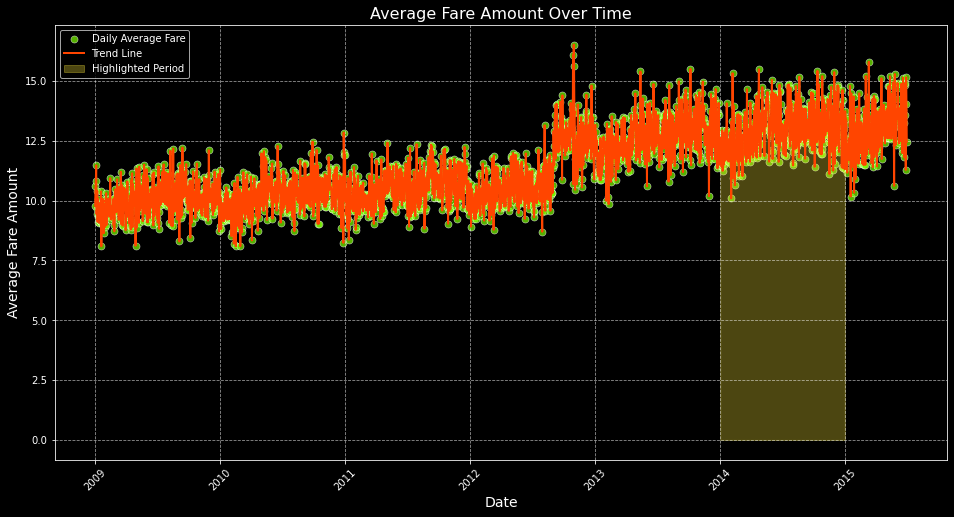

Columns in DataFrame: Index(['pickup_datetime', 'User ID', 'User Name', 'Driver Name',
       'Car Condition', 'Weather', 'Traffic Condition', 'key', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')


In [69]:
df_cleaned['pickup_datetime'] = pd.to_datetime(df_cleaned['pickup_datetime'])

# Set 'pickup_datetime' as index for resampling
df_cleaned.set_index('pickup_datetime', inplace=True)

# Resample by day and calculate the mean fare amount
daily_fare = df_cleaned['fare_amount'].resample('D').mean()

# Plotting
plt.figure(figsize=(16, 8))

# Scatter plot for daily fare
sns.scatterplot(x=daily_fare.index, y=daily_fare.values, color='#7cfc00', s=50, alpha=0.7, label='Daily Average Fare')

# Optional: Add a line plot to show trends over time
sns.lineplot(x=daily_fare.index, y=daily_fare.values, color='#ff4500', linewidth=2, label='Trend Line')

# Highlight a specific period (e.g., a month or a year)
start_date = '2014-01-01'
end_date = '2014-12-31'
highlighted_period = daily_fare[start_date:end_date]
plt.fill_between(highlighted_period.index, highlighted_period.values, color='#ffeb3b', alpha=0.3, label='Highlighted Period')

# Titles and labels
plt.title('Average Fare Amount Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Fare Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend()

# Show the plot
plt.show()

# Reset index to bring 'pickup_datetime' back as a column
df_cleaned.reset_index(inplace=True)

# Verify if 'pickup_datetime' is back
print("Columns in DataFrame:", df_cleaned.columns)

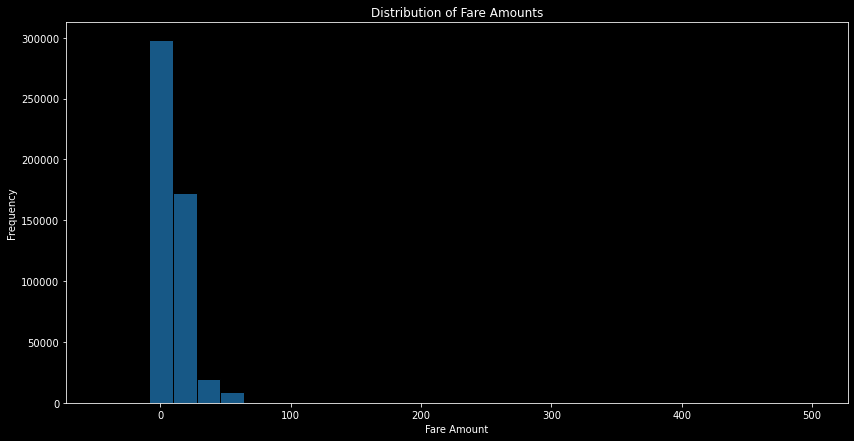

In [117]:
plt.figure(figsize=(14, 7))
sns.histplot(
    df_cleaned['fare_amount'],
    bins=30,  # Adjust number of bins if needed
    kde=False,  # Set to True if you want to include a KDE plot
    color='#1f77b4',
    edgecolor='black'
)

# Add titles and labels
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')

# Show the plot
plt.grid(False)
plt.show()

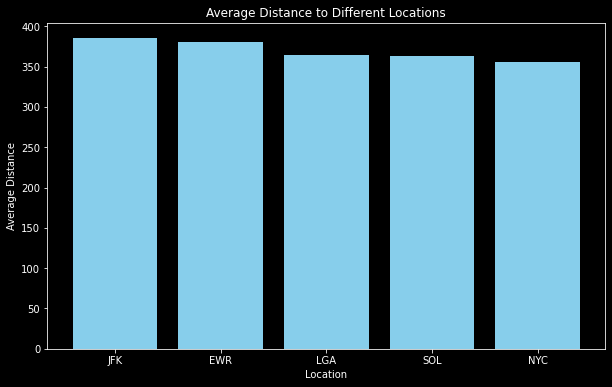

In [22]:
locations = ['JFK', 'EWR', 'LGA', 'SOL', 'NYC']
distances = [df_cleaned['jfk_dist'].mean(), df_cleaned['ewr_dist'].mean(), df_cleaned['lga_dist'].mean(), df_cleaned['sol_dist'].mean(), df_cleaned['nyc_dist'].mean()]

plt.figure(figsize=(10, 6))
plt.bar(locations, distances, color='skyblue')
plt.xlabel('Location')
plt.ylabel('Average Distance')
plt.title('Average Distance to Different Locations')
plt.show()

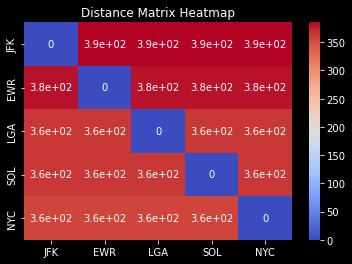

In [24]:
locations = ['JFK', 'EWR', 'LGA', 'SOL', 'NYC']
distances_matrix = np.zeros((len(locations), len(locations)))

for i, loc1 in enumerate(locations):
    for j, loc2 in enumerate(locations):
        if i == j:
            distances_matrix[i, j] = 0
        else:
            # Calculate the distance between loc1 and loc2
            dist_col = f'{loc1.lower()}_dist'
            distances_matrix[i, j] = df_cleaned[dist_col].mean()  # Example calculation

# Plot heatmap
sns.heatmap(distances_matrix, annot=True, xticklabels=locations, yticklabels=locations, cmap='coolwarm')
plt.title('Distance Matrix Heatmap')
plt.show()

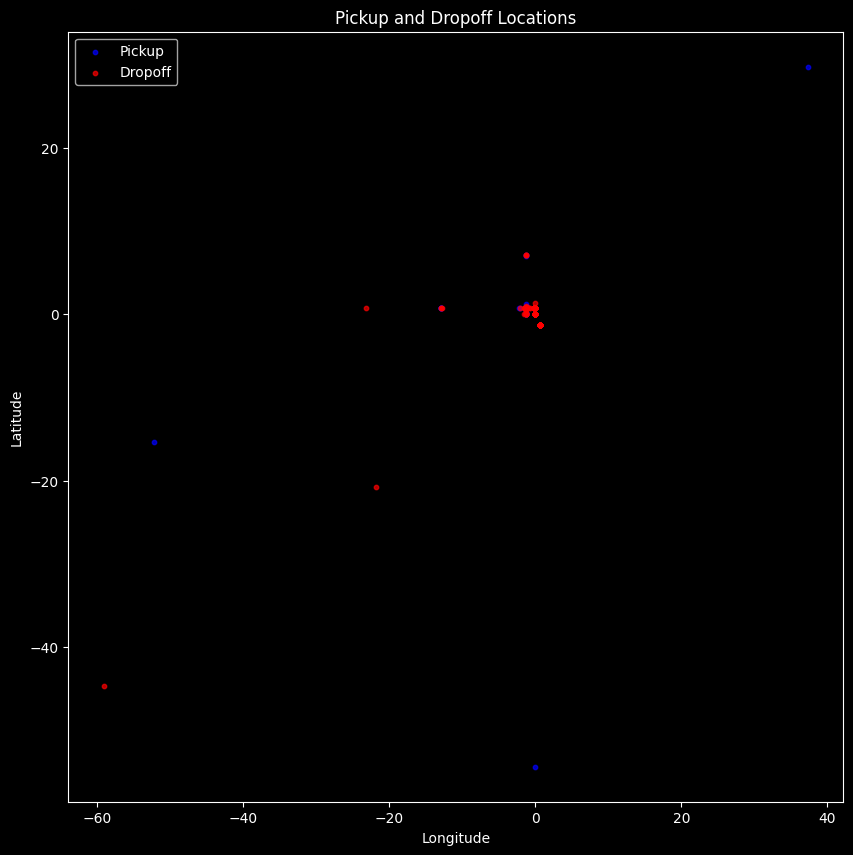

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(df_cleaned['pickup_longitude'], df_cleaned['pickup_latitude'], alpha=0.7, s=10, c='blue', label='Pickup')
plt.scatter(df_cleaned['dropoff_longitude'], df_cleaned['dropoff_latitude'], alpha=0.7, s=10, c='red', label='Dropoff')
plt.title('Pickup and Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

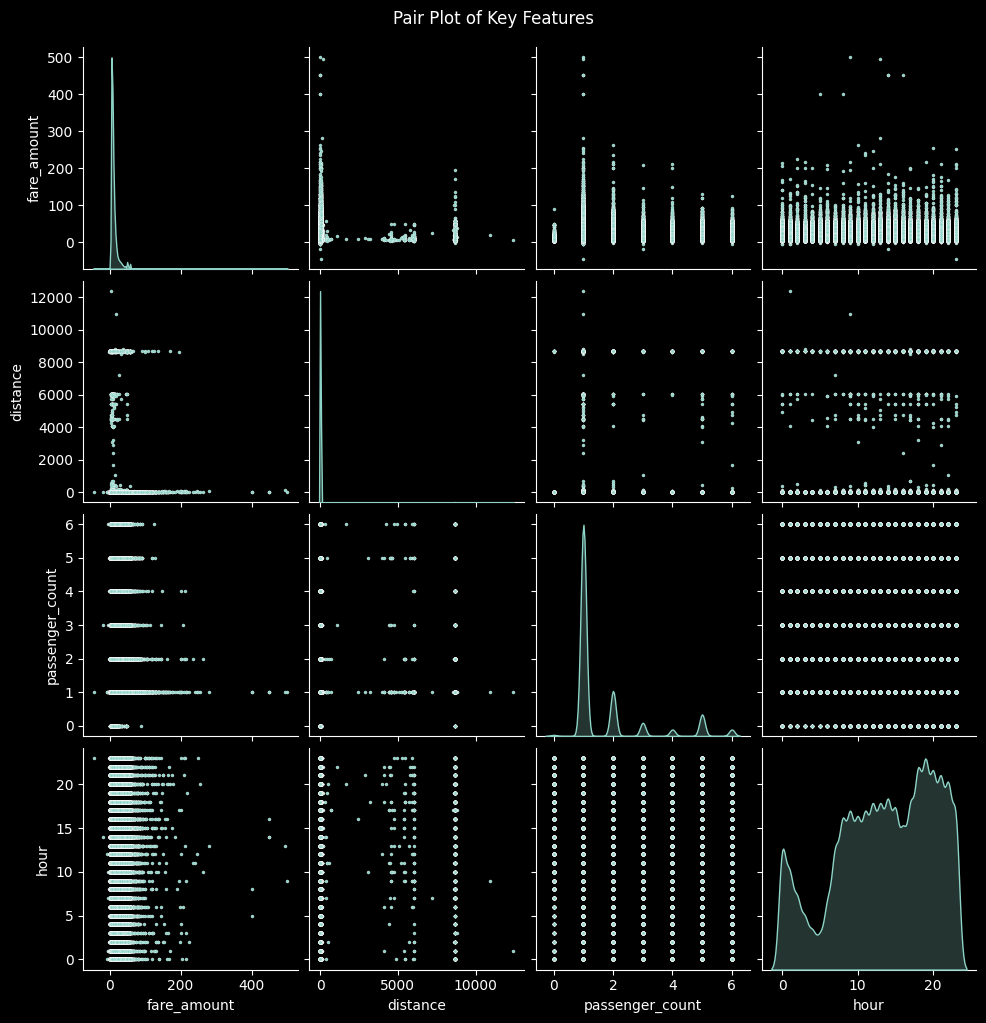

In [ ]:
features = ['fare_amount', 'distance', 'passenger_count', 'hour']

# Plot pairplot
sns.pairplot(df_cleaned[features], diag_kind='kde', plot_kws={"s": 5})
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

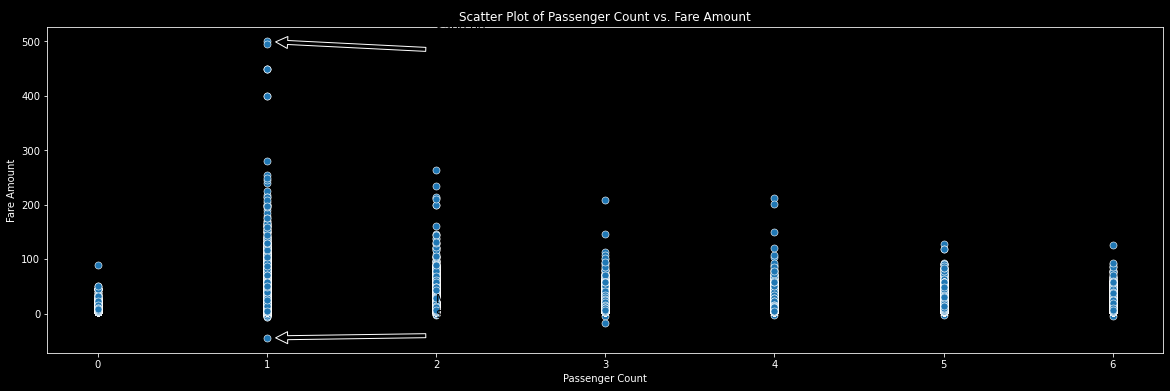

In [47]:
plt.figure(figsize=(20, 6))

# Plot the scatter plot
sns.scatterplot(
    x='passenger_count',
    y='fare_amount',
    data=df_cleaned,
    color='#1f77b4',  # Color of the points
    s=50  # Size of the scatter plot points
)

# Calculate max and min fare amounts
max_fare = df_cleaned['fare_amount'].max()
min_fare = df_cleaned['fare_amount'].min()

# Get the passenger counts corresponding to max and min fares
max_row = df_cleaned[df_cleaned['fare_amount'] == max_fare]
min_row = df_cleaned[df_cleaned['fare_amount'] == min_fare]

# Check if there's more than one row with the same max/min fare
max_passenger_count = max_row['passenger_count'].values[0]
min_passenger_count = min_row['passenger_count'].values[0]

# Annotate max and min fare amounts on the plot
plt.annotate(
    f'Max Fare\n${max_fare:.2f}\nPassenger Count: {max_passenger_count}',
    xy=(max_row['passenger_count'].values[0], max_fare),
    xytext=(max_row['passenger_count'].values[0] + 1, max_fare - 10),
    fontsize=12, color='black',
    arrowprops=dict(facecolor='black', shrink=0.05)
)

plt.annotate(
    f'Min Fare\n${min_fare:.2f}\nPassenger Count: {min_passenger_count}',
    xy=(min_row['passenger_count'].values[0], min_fare),
    xytext=(min_row['passenger_count'].values[0] + 1, min_fare + 10),
    fontsize=12, color='black',
    arrowprops=dict(facecolor='black', shrink=0.05)
)

# Add titles and labels
plt.title('Scatter Plot of Passenger Count vs. Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.grid(False)  # Add grid for better readability

# Show the plot
plt.show()


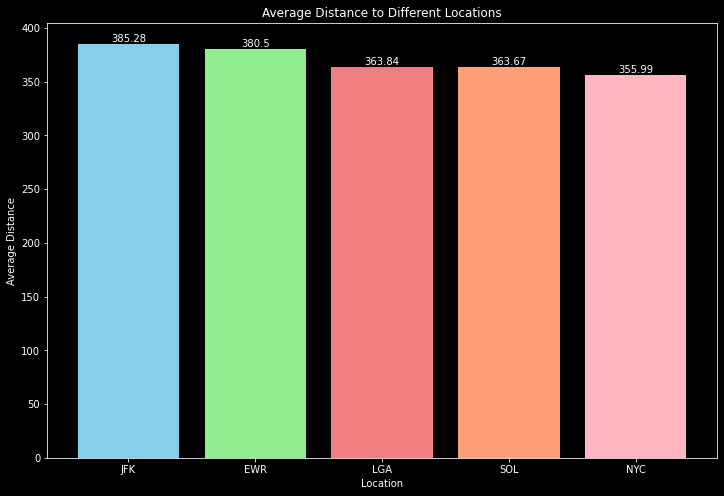

In [36]:
locations = ['JFK', 'EWR', 'LGA', 'SOL', 'NYC']
distances = [df_cleaned['jfk_dist'].mean(), df_cleaned['ewr_dist'].mean(), df_cleaned['lga_dist'].mean(), df_cleaned['sol_dist'].mean(), df_cleaned['nyc_dist'].mean()]

# Define a color palette for the bars
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink']

plt.figure(figsize=(12, 8))  # Increase the figure size
bars = plt.bar(locations, distances, color=colors)

plt.xlabel('Location')
plt.ylabel('Average Distance')
plt.title('Average Distance to Different Locations')

# Optionally, add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')

plt.show()

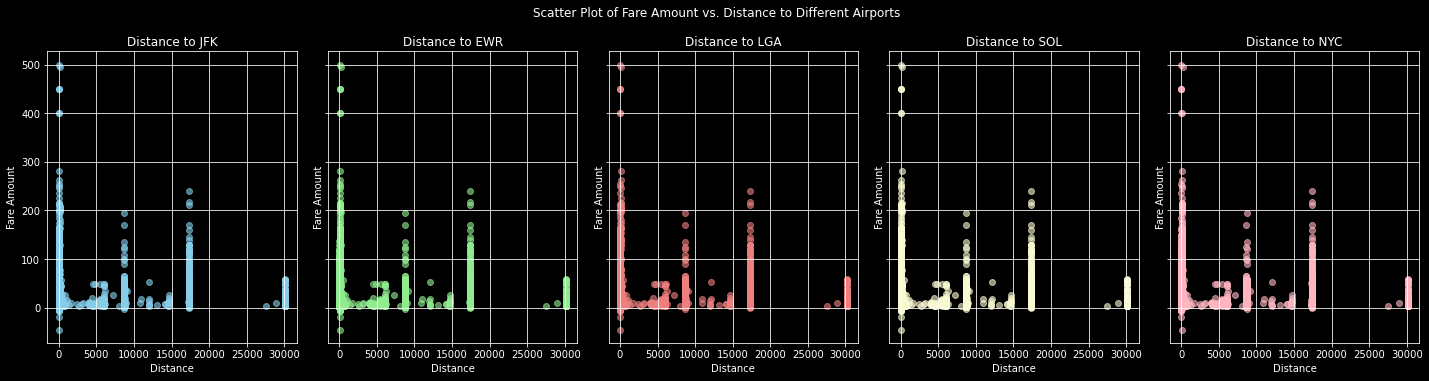

In [44]:
distance_columns = ['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist']
labels = ['JFK', 'EWR', 'LGA', 'SOL', 'NYC']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow', 'lightpink']  # Define different colors

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=len(distance_columns), figsize=(20, 5), sharey=True)

# Plot scatter plots for each distance type
for ax, col, label, color in zip(axes, distance_columns, labels, colors):
    ax.scatter(df_cleaned[col], df_cleaned['fare_amount'], color=color, alpha=0.6)
    ax.set_title(f'Distance to {label}')
    ax.set_xlabel('Distance')
    ax.set_ylabel('Fare Amount')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.suptitle('Scatter Plot of Fare Amount vs. Distance to Different Airports', y=1.05)
plt.show()

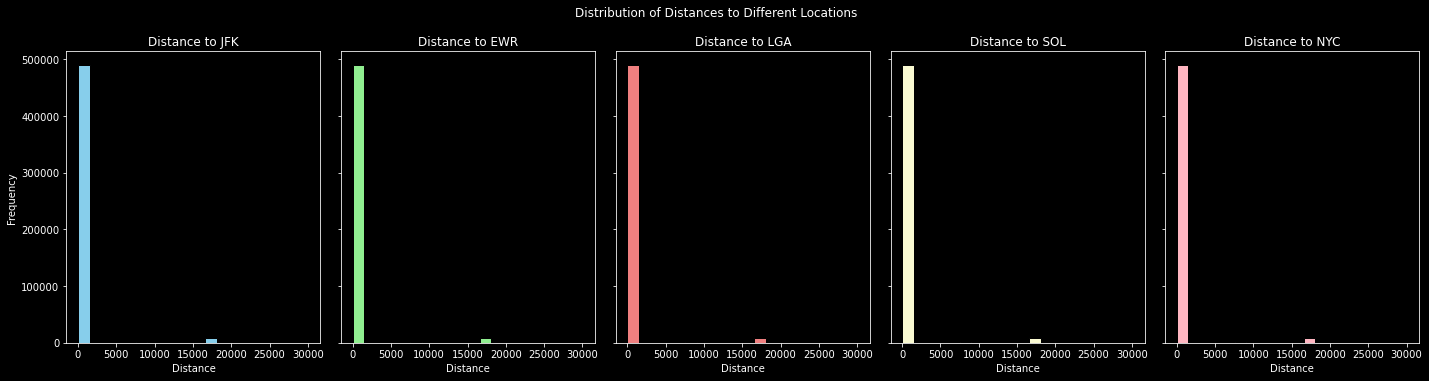

In [43]:
# Define the column names for each type of distance
distance_columns = ['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist']
labels = ['JFK', 'EWR', 'LGA', 'SOL', 'NYC']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow', 'lightpink']  # Define different colors

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=len(distance_columns), figsize=(20, 5), sharey=True)

# Plot histograms for each distance type
for ax, col, label, color in zip(axes, distance_columns, labels, colors):
    ax.hist(df_cleaned[col].dropna(), bins=20, color=color, edgecolor='black')
    ax.set_title(f'Distance to {label}')
    ax.set_xlabel('Distance')
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.suptitle('Distribution of Distances to Different Locations', y=1.05)
plt.show()

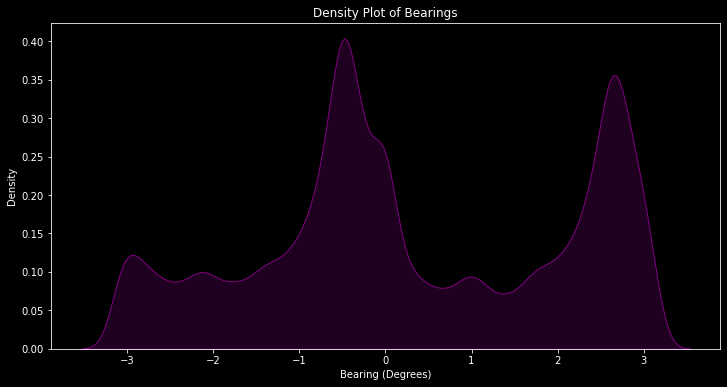

In [48]:
plt.figure(figsize=(12, 6))

# Plot density plot
sns.kdeplot(df_cleaned['bearing'], color='purple', fill=True)

# Add titles and labels
plt.title('Density Plot of Bearings')
plt.xlabel('Bearing (Degrees)')
plt.ylabel('Density')

# Show the plot
plt.show()

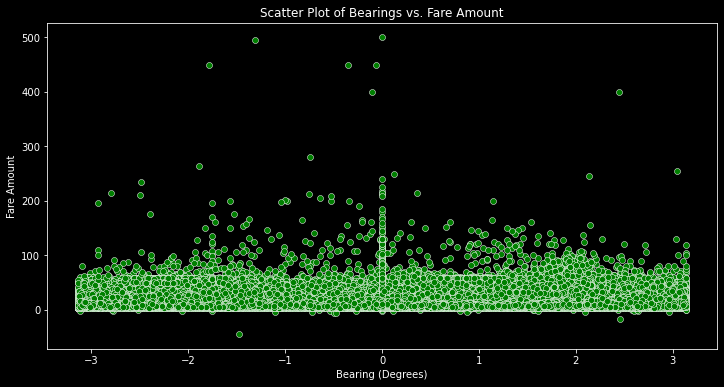

In [49]:
# Define the figure size
plt.figure(figsize=(12, 6))

# Plot scatter plot
sns.scatterplot(x='bearing', y='fare_amount', data=df_cleaned, color='green')

# Add titles and labels
plt.title('Scatter Plot of Bearings vs. Fare Amount')
plt.xlabel('Bearing (Degrees)')
plt.ylabel('Fare Amount')

# Show the plot
plt.show()

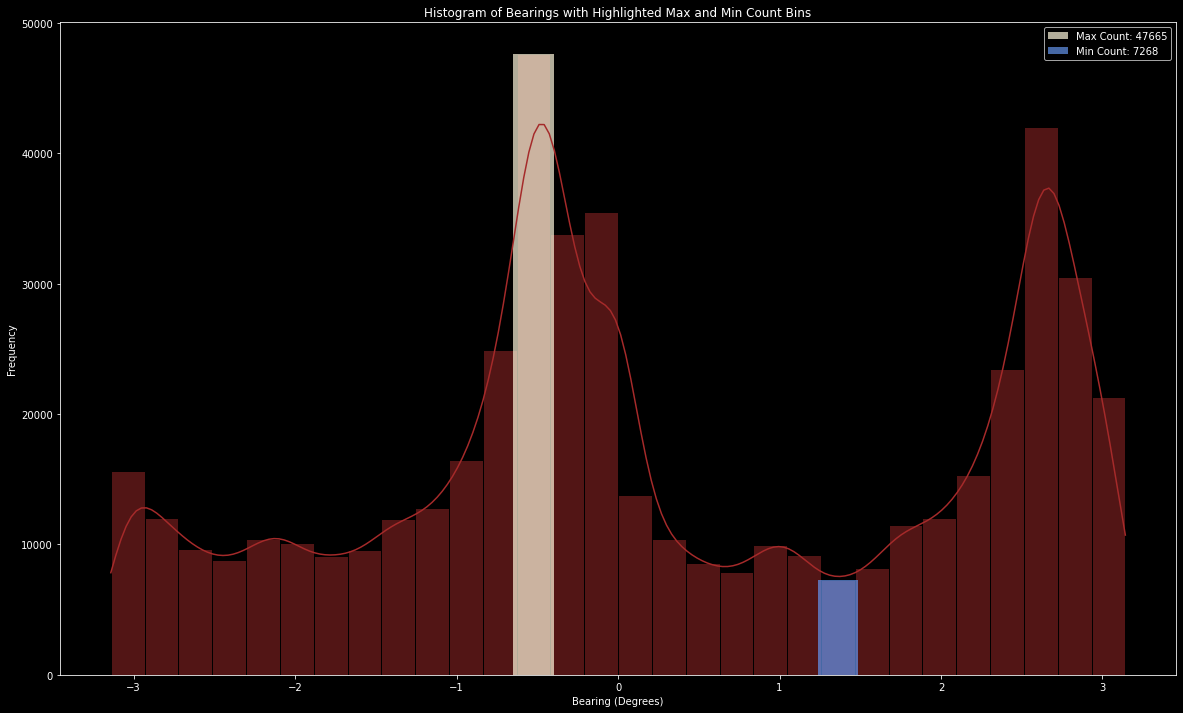

In [57]:
# Define the figure size



# Define the figure size
plt.figure(figsize=(20, 12))

# Plot histogram with KDE
hist_data = sns.histplot(df_cleaned['bearing'], bins=30, color='#a52a2a', kde=True, edgecolor='black')

# Get the counts and bin edges from the histogram
counts, bin_edges = np.histogram(df_cleaned['bearing'], bins=30)

# Find the bin with maximum and minimum counts
max_count_index = np.argmax(counts)
min_count_index = np.argmin(counts)

# Calculate the center of the max and min bins
max_bin_center = (bin_edges[max_count_index] + bin_edges[max_count_index + 1]) / 2
min_bin_center = (bin_edges[min_count_index] + bin_edges[min_count_index + 1]) / 2

# Highlight the max and min count bins with bars
plt.bar(max_bin_center, counts[max_count_index], width=0.25, color='#fff8dc', alpha=0.7, label=f'Max Count: {counts[max_count_index]}')
plt.bar(min_bin_center, counts[min_count_index], width=0.25, color='#6495ed', alpha=0.7, label=f'Min Count: {counts[min_count_index]}')

# Add titles and labels
plt.title('Histogram of Bearings with Highlighted Max and Min Count Bins')
plt.xlabel('Bearing (Degrees)')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [58]:
print(max_count_index)

12


In [ ]:
bearings = df_cleaned['bearing'].values

# Convert bearings to radians
bearings_rad = np.deg2rad(bearings)

# Compute frequencies (you might need to aggregate if there are duplicate bearings)
# For simplicity, we'll count occurrences of each bearing
unique_bearings, counts = np.unique(bearings_rad, return_counts=True)

# Create a circular plot for bearings
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Plot points (scatter) for each unique bearing
ax.scatter(unique_bearings, counts, s=100, color='blue', alpha=0.6)

# Set radial ticks and labels
ax.set_yticklabels([])
ax.set_xticks(unique_bearings)
ax.set_xticklabels([f'{int(np.rad2deg(b))}°' for b in unique_bearings])

plt.title('Bearing Distribution')
plt.show()